### Import Packages

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='once')

### Import Data

In [60]:
subDataFile = ".\\dataProfitMarginSubset.csv"
subsetData = pd.read_csv(subDataFile)
subsetData = subsetData.drop_duplicates('id')
subsetData.head(3)

id             title                               production_companies  \
0    862         Toy Story     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1   8844           Jumanji  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  15602  Grumpier Old Men  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   

                                production_countries  adult  popularity  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   True   21.946943   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   True   17.015539   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   True   11.712900   

  release_date  runtime  vote_average  vote_count  ...  \
0   1995-10-30     81.0           7.7      5415.0  ...   
1   1995-12-15    104.0           6.9      2413.0  ...   
2   1995-12-22    101.0           6.5        92.0  ...   

   editorTot_HistAveRating  editorTot_AllAveRating  \
0                20.683709                6.726190   
1                 7.352651                6.227273   
2                      NaN                     NaN   

   editorTot_AllVoteAveRating  keywordTot_AveRating  genreTot_RankedAveRating  \
0                    7.524399              6.378346                  5.913436   
1                    6.474549              6.078460                  5.739320   
2                         NaN              6.144337                  5.756752   

       budget      revenue     Domestic  BoxOfficeProfitMargin  profit_margin  
0  30000000.0  373554033.0  223225679.0             644.085597     1145.18011  
1  65000000.0  262797249.0  100499940.0              54.615292      304.30346  
2  25000000.0   71500000.0   71518503.0             186.074012      186.00000  

[3 rows x 57 columns]

### Check and fill Null values

In [61]:
print("Shape with null vals {0}".format(subsetData.shape))
subNonNull = subsetData.dropna()
print("Shape without null value rows {0}".format(subNonNull.shape))


print(subsetData.isna().sum())

values = {}

columnList = ['actors_AveRating_average', 'actors_AveRating_total',
       'actors_RankedAveRating_average', 'actors_RankedAveRating_total',
       'actors_Top3AveRating_total', 'actors_VoteAve_average',
       'actors_VoteAve_total', 'actors_RankedVoteAve_average',
       'actors_RankedVoteAve_total', 'actors_Top3VoteAve_total',
       'actors_HistAve_average', 'actors_HistAve_total',
       'actors_RankedHistAve_average', 'actors_RankedHistAve_total',
       'actors_Top3HistAve_total', 'actors_AllMovieAve_average',
       'actors_AllMovieAve_total', 'actors_RankedAllMovieAve_average',
       'actors_RankedAllMovieAve_total', 'actors_Top3RankedAllMovieAve_total',
       'actors_AllMovieVoteAve_average', 'actors_AllMovieVoteAve_total',
       'actors_RankedAllMovieVoteAve_average',
       'actors_RankedAllMovieVoteAve_total',
       'actors_Top3RankedAllMovieVoteAve_total', 'directorTot_AveRating',
       'directorTot_VoteAveRating', 'directorTot_HistAveRating',
       'directorTot_AllAveRating',
       'directorTot_AllVoteAveRating','screenwriterTot_AveRating',
       'screenwriterTot_VoteAveRating', 'screenwriterTot_HistAveRating',
       'screenwriterTot_AllAveRating','screenwriterTot_AllVoteAveRating',
       'editorTot_AveRating', 'editorTot_VoteAveRating',
       'editorTot_HistAveRating', 'editorTot_AllAveRating',
       'editorTot_AllVoteAveRating', 'keywordTot_AveRating',
       'genreTot_RankedAveRating'];

for col in columnList:
    values[col] = np.mean(subsetData[col])
    

subNonNull = subsetData.copy()
subNonNull = subNonNull.fillna(value = values)
print(subNonNull.isna().sum())

subNonNull= subNonNull.dropna()
subNonNull = subNonNull.drop_duplicates('id')

print("Shape after filling some nulls: {0}".format(subNonNull.shape))

Shape with null vals (7592, 57)
Shape without null value rows (1897, 57)
id                                           0
title                                        0
production_companies                         0
production_countries                         0
adult                                        0
popularity                                   0
release_date                                 0
runtime                                      3
vote_average                                 0
vote_count                                   0
actors_AveRating_average                   129
actors_AveRating_total                     129
actors_RankedAveRating_average             129
actors_RankedAveRating_total               129
actors_Top3AveRating_total                 251
actors_VoteAve_average                     132
actors_VoteAve_total                       132
actors_RankedVoteAve_average               132
actors_RankedVoteAve_total                 132
actors_Top3VoteAve_total          

In [62]:
subNonNull.loc[:,'release_date'] =subNonNull['release_date'].apply(pd.to_datetime)

### Summarize Data

#### Data types

In [63]:
print(subNonNull.dtypes)

id                                                 int64
title                                             object
production_companies                              object
production_countries                              object
adult                                               bool
popularity                                       float64
release_date                              datetime64[ns]
runtime                                          float64
vote_average                                     float64
vote_count                                       float64
actors_AveRating_average                         float64
actors_AveRating_total                           float64
actors_RankedAveRating_average                   float64
actors_RankedAveRating_total                     float64
actors_Top3AveRating_total                       float64
actors_VoteAve_average                           float64
actors_VoteAve_total                             float64
actors_RankedVoteAve_average   

#### Box Office Profit Margin over time

In [64]:
_ = sns.relplot(x='release_date',y='BoxOfficeProfitMargin',data=subNonNull)
plt.show()

### Adult Vs Non Adult Profit Margin over time

In [65]:
adultGrouped = subNonNull.groupby('adult')
adultGrouped['BoxOfficeProfitMargin'].describe()

count           mean           std      min        25%       50%  \
adult                                                                      
True   5644.0  279014.874277  1.032168e+07 -99.9985 -61.873593  2.992364   

             75%          max  
adult                          
True   128.05531  655225400.0

#### Only adult films remain in dataset, not useful parameter unfortunately

## Profit margin descriptions

In [66]:
#Create Profit Ratio, another measure of BoxOffice Profit Margin with non negative values
subNonNull['profitRatio'] = subNonNull['Domestic']/subNonNull['budget']

margins = subNonNull[['BoxOfficeProfitMargin','profit_margin', 'profitRatio']]
margins.describe()

BoxOfficeProfitMargin  profit_margin   profitRatio
count           5.644000e+03   5.644000e+03  5.644000e+03
mean            2.790149e+05   2.880594e+04  2.791149e+03
std             1.032168e+07   2.058197e+06  1.032168e+05
min            -9.999850e+01  -9.999991e+01  1.500000e-05
25%            -6.187359e+01  -2.574680e+01  3.812641e-01
50%             2.992364e+00   9.525014e+01  1.029924e+00
75%             1.280553e+02   3.051775e+02  2.280553e+00
max             6.552254e+08   1.545929e+08  6.552255e+06

<Figure size 432x288 with 0 Axes>

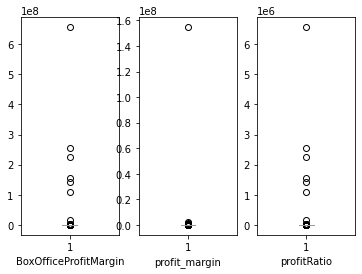

In [67]:
plt.suptitle('Profit Margin Box Plots')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.boxplot(subNonNull['BoxOfficeProfitMargin'])
ax1.set_xlabel('BoxOfficeProfitMargin')
ax2.boxplot(subNonNull['profit_margin'])
ax2.set_xlabel('profit_margin')
ax3.boxplot(subNonNull['profitRatio'])
ax3.set_xlabel('profitRatio')

plt.show()

#### ProfitRatio without outliers

In [68]:
_=sns.boxplot(x = 'profitRatio', data=subNonNull, showfliers=False)
plt.show()

#### Check for unreasonably low film budgets, which would lead to unresonably high profit ratios

20
                                             title  budget    Domestic
226   City Slickers II: The Legend of Curly's Gold    40.0  43622150.0
1290                                  Lost & Found     1.0   6552255.0
1939                   Rugrats in Paris: The Movie    30.0  76507756.0
1959                                       Pollock     6.0   8598593.0
2387                                American Adobo   344.0    344992.0
2925                          Same Time, Next Year   118.0  19703082.0
2927                      Kiss of the Spider Woman    11.0  17005229.0
3011                                   Housesitter    26.0  58500635.0
3246                            The Last Broadcast   900.0     12097.0
3401                                     Tarnation   218.0    592014.0
3645                               Assisted Living   500.0     49048.0
3976                     The Notorious Bettie Page    90.0   1415082.0
4189                                Starter for 10     8.0    216839.0
420

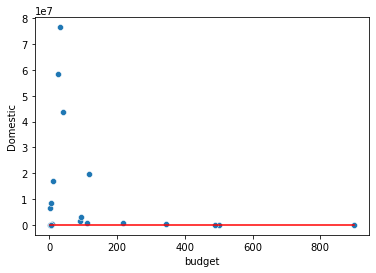

In [69]:
minFund = 2000
minFundDF = subNonNull[subNonNull['budget']<=minFund]
print(len(minFundDF))
print(minFundDF[['title','budget','Domestic']])


_ = sns.scatterplot(x='budget', y='Domestic', data=minFundDF )
x = np.linspace(min(minFundDF['budget']), max(minFundDF['budget']), 1000)
plt.plot(x, x, color='r');
plt.show()

#### Remove the low budget films listed above and outliers

In [70]:
subNonNull = subNonNull[subNonNull['budget']>2000]

profitRatioStdDev = subNonNull['profitRatio'].std()
profitRatioMean = subNonNull['profitRatio'].mean()

subNonNull[(subNonNull['profitRatio']>(profitRatioMean+3*profitRatioStdDev))][['title','budget','Domestic','BoxOfficeProfitMargin','profitRatio']]

title     budget     Domestic  \
307   Snow White and the Seven Dwarfs  1488423.0  184925486.0   
931                         Halloween   325000.0   47160000.0   
956                             Bambi   858000.0  102247150.0   
1207     The Texas Chain Saw Massacre    85000.0   30859000.0   
1339          The Blair Witch Project    60000.0  140539099.0   
1646                American Graffiti   777000.0  115000000.0   
2469                              Joe   106000.0   19319254.0   
3293                    Super Size Me    65000.0   11536423.0   
3589                       Open Water   130000.0   30610863.0   
4412                  One Missed Call    20000.0   26890041.0   
4849              Paranormal Activity   215000.0  107918810.0   
6785                      The Gallows   100000.0   22764410.0   

      BoxOfficeProfitMargin  profitRatio  
307            12324.256142   124.242561  
931            14410.769231   145.107692  
956            11816.917249   119.169172  
1207           36204.705882   363.047059  
1339          234131.831667  2342.318317  
1646           14700.514801   148.005148  
2469           18125.711321   182.257113  
3293           17648.343077   177.483431  
3589           23446.817692   235.468177  
4412          134350.205000  1344.502050  
4849           50094.795349   501.947953  
6785           22664.410000   227.644100

In [72]:
subNonNull[(subNonNull['BoxOfficeProfitMargin']<(profitRatioMean-3*profitRatioStdDev))][['title','budget','Domestic','BoxOfficeProfitMargin','profitRatio']]

Empty DataFrame
Columns: [title, budget, Domestic, BoxOfficeProfitMargin, profitRatio]
Index: []

In [74]:
subNonNull = subNonNull[(subNonNull['profitRatio']>=(profitRatioMean+-3*profitRatioStdDev))& \
                         (subNonNull['profitRatio']<=(profitRatioMean+3*profitRatioStdDev))]

#### Replot Profit Margin Boxplots 

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Profit Margin Box Plots')
ax1.boxplot(subNonNull['BoxOfficeProfitMargin'])
ax1.set_xlabel('BoxOfficeProfitMargin')
ax2.boxplot(subNonNull['profit_margin'])
ax2.set_xlabel('profit_margin')
ax3.boxplot(subNonNull['profitRatio'])
ax3.set_xlabel('profitRatio')

plt.show()

#### Transform Profit Ratio to a more Normal Distribution using BoxCox

<AxesSubplot:>

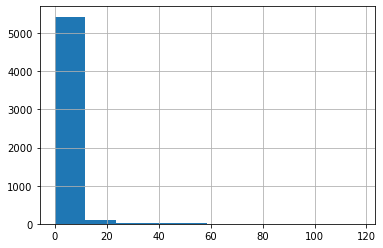

In [76]:
subNonNull['profitRatio'].hist()

count    5612.000000
mean       -0.043174
std         1.625510
min        -5.091997
25%        -0.894473
50%         0.020070
75%         0.871455
max         7.240285
Name: profitRatio_BoxCox, dtype: float64


<AxesSubplot:>

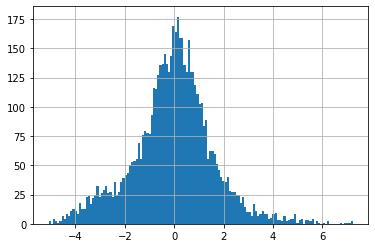

In [79]:
import scipy.stats

ret, val = scipy.stats.boxcox(subNonNull['profitRatio'])
subNonNull['profitRatio_BoxCox'] = ret
print(subNonNull['profitRatio_BoxCox'].describe())
subNonNull['profitRatio_BoxCox'].hist(bins=140)

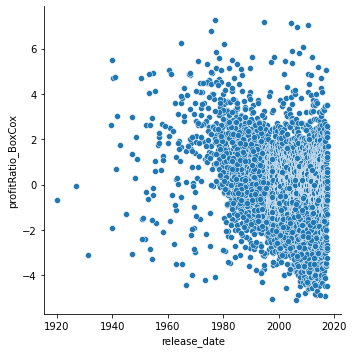

In [80]:
_ = sns.relplot(x='release_date',y='profitRatio_BoxCox',data=subNonNull)
plt.show()

## Correlation Matrices

### All Parameters

<AxesSubplot:>

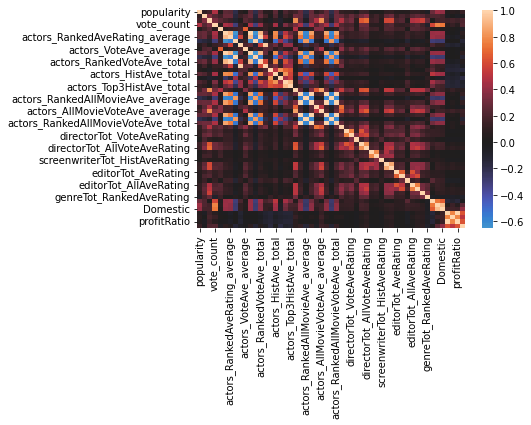

In [81]:
# Make a heatmap of the data 
subNonNullNumeric = subNonNull[['popularity', 'runtime', 'vote_average', 'vote_count', 'actors_AveRating_average', 'actors_AveRating_total', 'actors_RankedAveRating_average', 'actors_RankedAveRating_total', 'actors_Top3AveRating_total', 'actors_VoteAve_average', 'actors_VoteAve_total', 'actors_RankedVoteAve_average', 'actors_RankedVoteAve_total', 'actors_Top3VoteAve_total', 'actors_HistAve_average', 'actors_HistAve_total', 'actors_RankedHistAve_average', 'actors_RankedHistAve_total', 'actors_Top3HistAve_total', 'actors_AllMovieAve_average', 'actors_AllMovieAve_total', 'actors_RankedAllMovieAve_average', 'actors_RankedAllMovieAve_total', 'actors_Top3RankedAllMovieAve_total', 'actors_AllMovieVoteAve_average', 'actors_AllMovieVoteAve_total', 'actors_RankedAllMovieVoteAve_average', 'actors_RankedAllMovieVoteAve_total', 'actors_Top3RankedAllMovieVoteAve_total', 'directorTot_AveRating', 'directorTot_VoteAveRating', 'directorTot_HistAveRating', 'directorTot_AllAveRating', 'directorTot_AllVoteAveRating', 'screenwriterTot_AveRating', 'screenwriterTot_VoteAveRating', 'screenwriterTot_HistAveRating', 'screenwriterTot_AllAveRating', 'screenwriterTot_AllVoteAveRating', 'editorTot_AveRating', 'editorTot_VoteAveRating', 'editorTot_HistAveRating', 'editorTot_AllAveRating', 'editorTot_AllVoteAveRating', 'keywordTot_AveRating', 'genreTot_RankedAveRating', 'budget', 'revenue', 'Domestic', 'BoxOfficeProfitMargin', 'profit_margin', 'profitRatio', 'profitRatio_BoxCox']]
targetVariables = ['profitRatio_BoxCox']

sns.heatmap(subNonNullNumeric.corr(), center = 0)

<div class="span5 alert alert-success">
    <h4> None of the features have a strong correlation with profitRatio BoxCox, but they are investigated in more detail below</h4>
</div>  

### Meta Data Features
##### Unprocessed features from MetaData.csv

<AxesSubplot:>

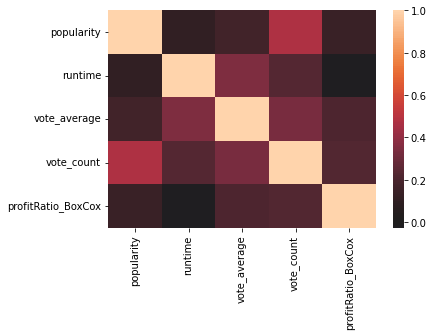

In [82]:
params = ['popularity', 'runtime', 'vote_average', 'vote_count']

params.extend(targetVariables)

subset = subNonNullNumeric[params]
sns.heatmap(subset.corr(), center = 0)

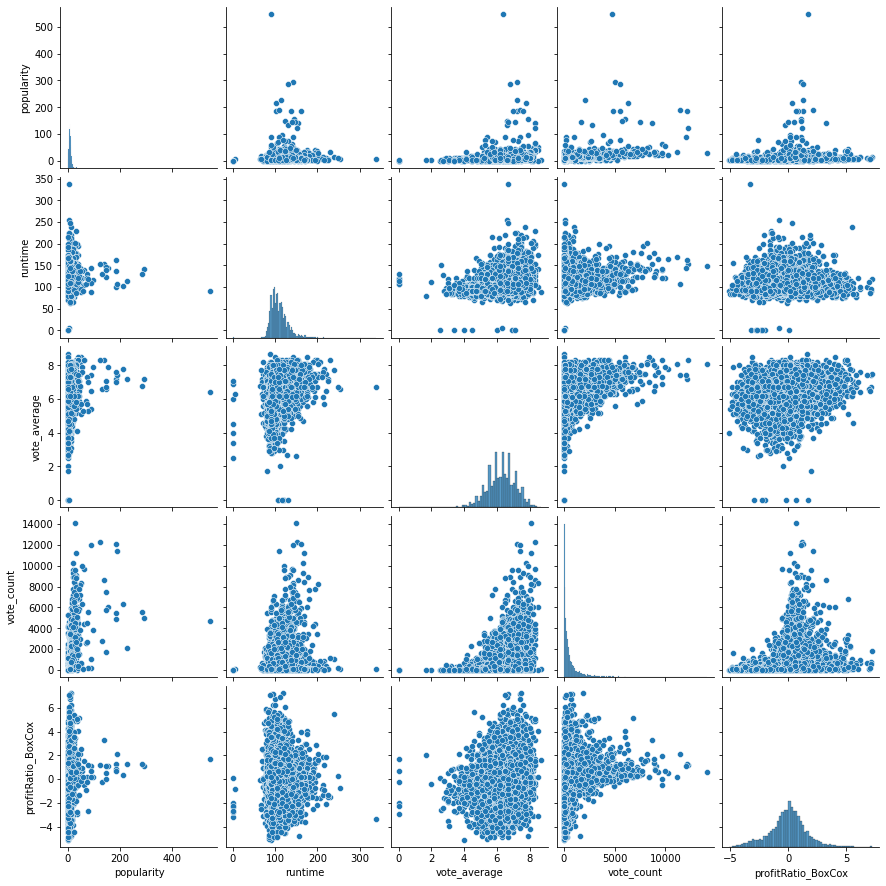

In [83]:
sns.pairplot(subset)

<div class="span5 alert alert-success">
    <h4> Vote Average and Vote Count have small, positive correlations with profitRatio BoxCox</h4>
</div>  

### Actors Previous Movies Average Rating
<ul>
    <li> <b>AveRating_total</b> - 
        <br>1) For each cast memeber, take mean of ratings of all of their <b>PREVIOUS</b> movies in dataset
        <br>2) Add together all the averaged ratings for each cast member
    </li>
    <br>
    <li> <b>AveRating_average</b> -
        <br>Mean of <i>AveRating_total</i>
    </li>
    <br>
    <li> <b>RankedAveRating_total</b> - 
        <br>1) For each cast memeber, take mean of ratings of all of their <b>PREVIOUS</b> movies in dataset
        <br>2) Weight cast member's mean rating based on their order in this movies cast list, and sum all together
    </li>
    <br>
    <li> <b>RankedAveRating_average</b> -
        <br>Mean of <i>RankedAveRating_total</i>
    </li>
    <br>
    <li> <b>Top3AveRating_total</b> - 
        <br>1) For only the top 3 cast members listed, take mean of ratings of all of their <b>PREVIOUS</b> movies in dataset
        <br>2) Sum these three average ratings together
    </li>
</ul>

<AxesSubplot:>

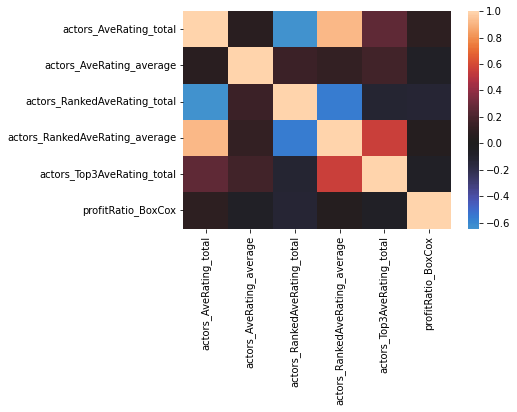

In [84]:
params = [  'actors_AveRating_total', 
            'actors_AveRating_average',  
            'actors_RankedAveRating_total', 
            'actors_RankedAveRating_average', 
            'actors_Top3AveRating_total']

params.extend(targetVariables)

subset = subNonNullNumeric[params]
sns.heatmap(subset.corr(), center = 0)

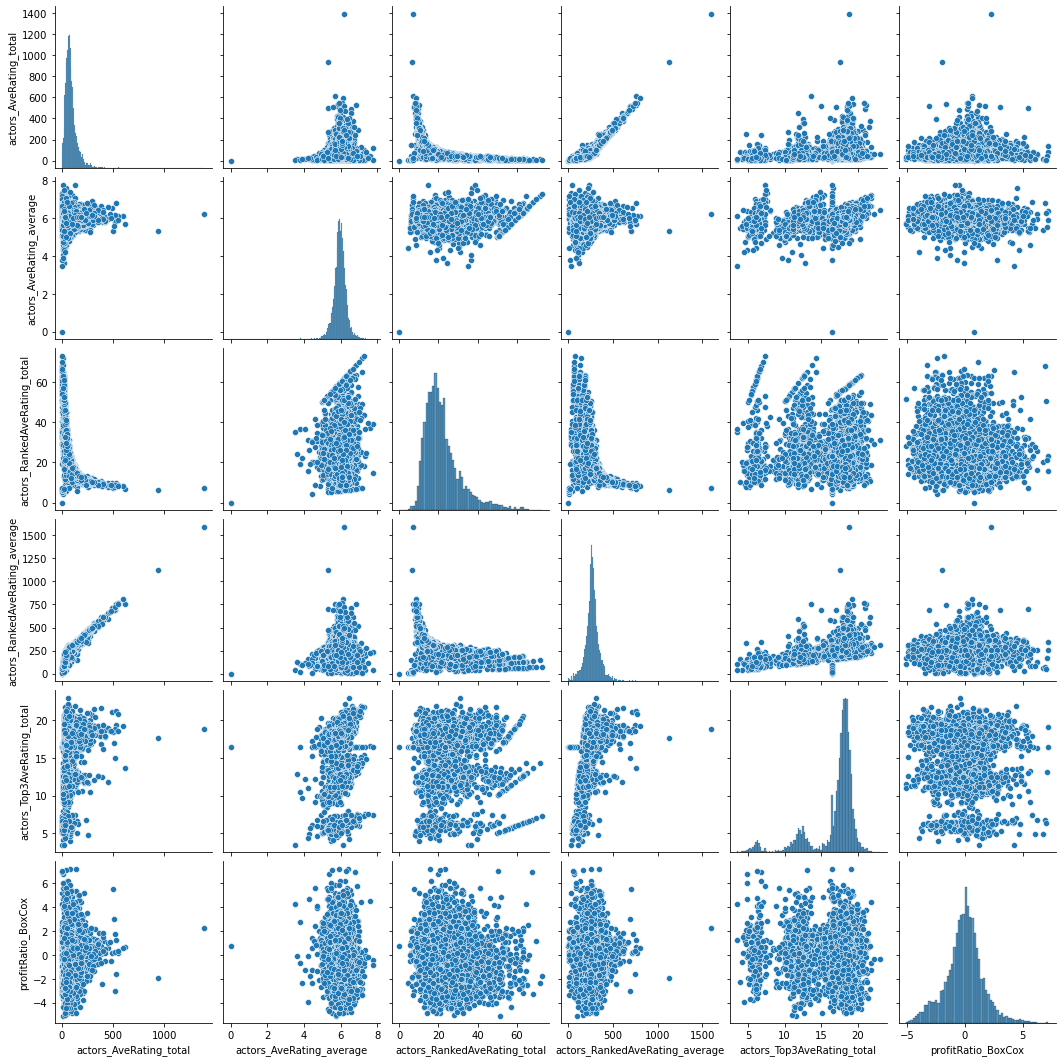

In [85]:
sns.pairplot(subset)

### Actors All Movies Average Rating
<ul>
    <li> <b>AllMovieAve_total</b> - 
        <br>1) For each cast memeber, take mean of ratings of <b>ALL</b> of their movies in dataset
        <br>2) Add together all the averaged ratings for each cast member
    </li>
    <br>
    <li> <b>AllMovieAve_average</b> -
        <br>Mean of <i>actors_AllMovieAve_total</i>
    </li>
    <br>
    <li> <b>RankedAllMovieAve_total</b> - 
        <br>1) For each cast memeber, take mean of ratings of <b>ALL</b> of their movies in dataset
        <br>2) Weight cast member's mean rating based on their order in this movies cast list, and sum all together
    </li>
    <br>
    <li> <b>RankedAllMovieAve_average</b> -
        <br>Mean of <i>actors_RankedAllMovieAve_total</i>
    </li>
    <br>
    <li> <b>Top3RankedAllMovieAve_total</b> - 
        <br>1) For only the top 3 cast members listed, take mean of ratings of <b>ALL</b> of their previous movies in dataset
        <br>2) Sum these three average ratings together
    </li>
</ul>

<AxesSubplot:>

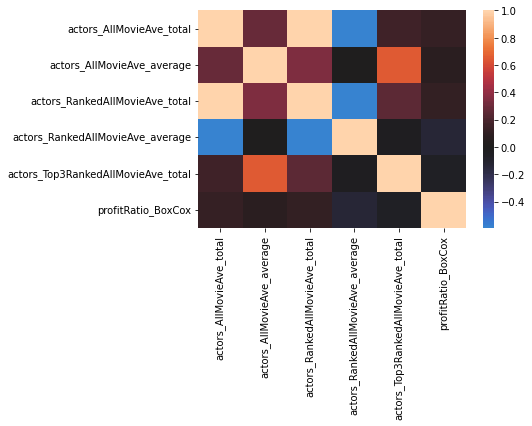

In [86]:
params = ['actors_AllMovieAve_total',
                     'actors_AllMovieAve_average',
                     'actors_RankedAllMovieAve_total', 
                     'actors_RankedAllMovieAve_average',
                     'actors_Top3RankedAllMovieAve_total']
params.extend(targetVariables)

subset = subNonNullNumeric[params]
sns.heatmap(subset.corr(), center = 0)


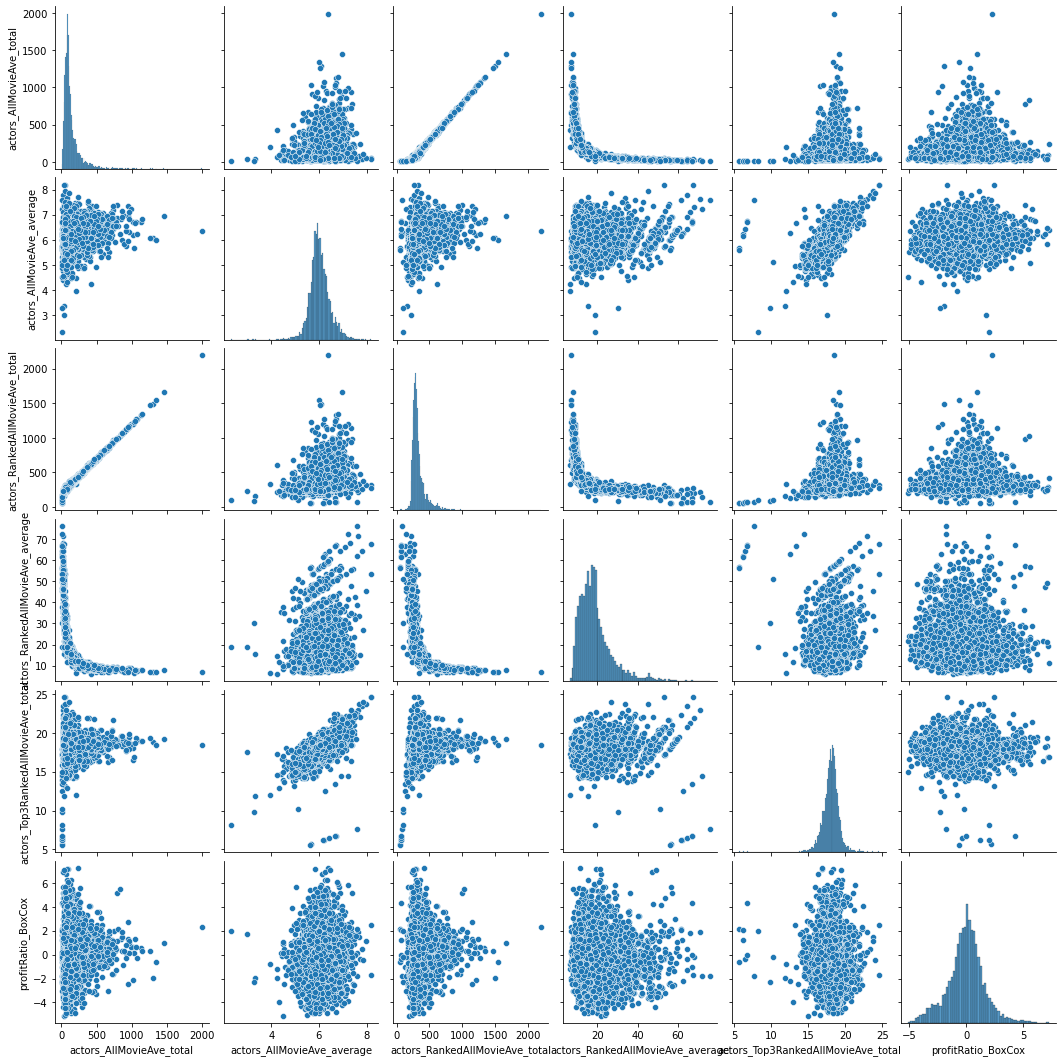

In [87]:
sns.pairplot(subset)

### Actors Previous Movies Average Vote Rating
<ul>
    <li> <b>VoteAve_total</b> - 
        <br>1) For each cast memeber, find all their <b>PREVIOUS</b> movies in dataset
        <br>2) For each of their movies, multiply rating by votes, and add to a running total
        <br>3) Divide running Total by count of all votes to get an average score for this cast member
        <br>4) Add together all the averaged ratings for each cast member
    </li>
    <br>
    <li> <b>VoteAve_average</b> -
        <br>Mean of <i>VoteAve_total</i>
    </li>
    <br>
    <li> <b>RankedVoteAve_total</b> - 
        <br>1) For each cast memeber, find all their <b>PREVIOUS</b> movies in dataset
        <br>2) For each of their movies, multiply rating by votes, and add to a running total
        <br>3) Divide running Total by count of all votes to get an average score for this cast member
        <br>4) Weight cast member's mean rating based on their order in this movies cast list
        <br>5) Add together all weighted values for each cast member
    </li>
    <br>
    <li> <b>RankedVoteAve_average</b> -
        <br>Mean of <i>RankedVoteAve_total</i>
    </li>
    <br>
    <li> <b>Top3VoteAve_total</b> - 
        <br>1) For the first 3 cast memebers, find all their <b>PREVIOUS</b> movies in dataset
        <br>2) For each of their movies, multiply rating by votes, and add to a running total
        <br>3) Divide running Total by count of all votes to get an average score for this cast member
        <br>4) Add together all the averaged ratings for each cast member
    </li>
</ul>

<AxesSubplot:>

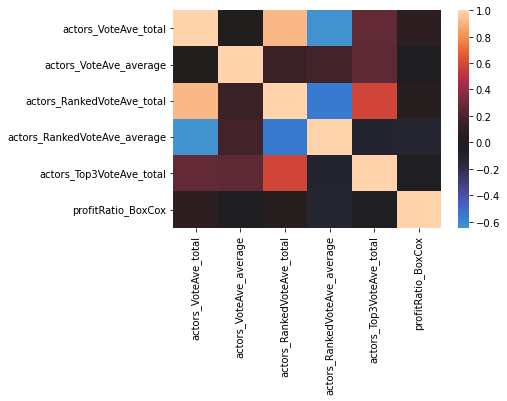

In [88]:
params = ['actors_VoteAve_total',
         'actors_VoteAve_average',
         'actors_RankedVoteAve_total', 
         'actors_RankedVoteAve_average', 
         'actors_Top3VoteAve_total']

params.extend(targetVariables)

subset = subNonNullNumeric[params]
sns.heatmap(subset.corr(), center = 0)

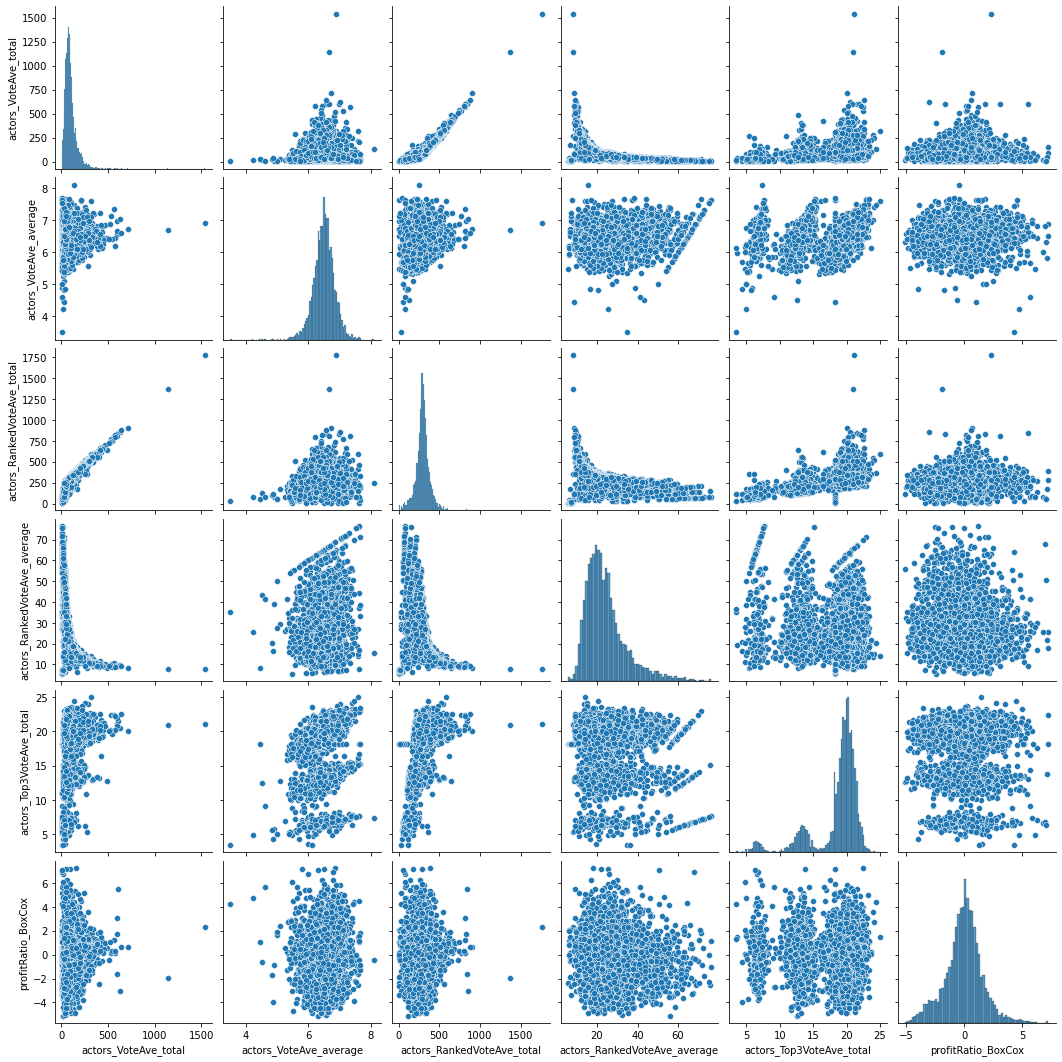

In [89]:
sns.pairplot(subset)

### Actors ALL Movies Average Vote Rating
<ul>
    <li> <b>AllMovieVoteAve_total</b> - 
        <br>1) For each cast memeber, find <b>ALL</b> their movies in dataset
        <br>2) For each of their movies, multiply rating by votes, and add to a running total
        <br>3) Divide running Total by count of all votes to get an average score for this cast member
        <br>4) Add together all the averaged ratings for each cast member
    </li>
    <br>
    <li> <b>AllMovieVoteAve_average</b> -
        <br>Mean of <i>AllMovieVoteAve_total</i>
    </li>
    <br>
    <li> <b>RankedAllMovieVoteAve_total</b> - 
        <br>1) For each cast memeber, find  <b>ALL</b> their movies in dataset
        <br>2) For each of their movies, multiply rating by votes, and add to a running total
        <br>3) Divide running Total by count of all votes to get an average score for this cast member
        <br>4) Weight cast member's mean rating based on their order in this movies cast list
        <br>5) Add together all weighted values for each cast member
    </li>
    <br>
    <li> <b>RankedAllMovieVoteAve_average</b> -
        <br>Mean of <i>RankedAllMovieVoteAve_total</i>
    </li>
    <br>
    <li> <b>Top3RankedAllMovieVoteAve_total</b> - 
        <br>1) For the first 3 cast memebers, find <b>ALL</b> their movies in dataset
        <br>2) For each of their movies, multiply rating by votes, and add to a running total
        <br>3) Divide running Total by count of all votes to get an average score for this cast member
        <br>4) Add together the 3 averaged ratings for each cast member
    </li>
</ul>

<AxesSubplot:>

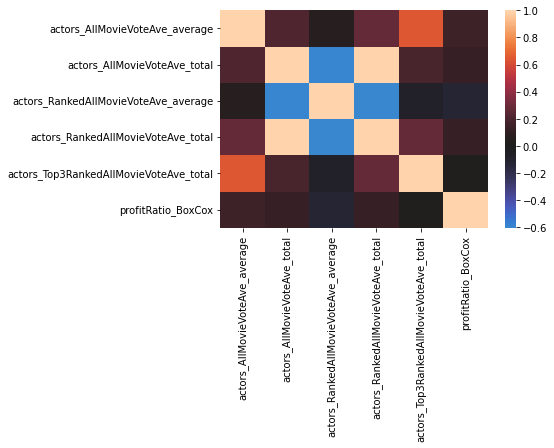

In [90]:
params= ['actors_AllMovieVoteAve_average', 
                     'actors_AllMovieVoteAve_total',
                     'actors_RankedAllMovieVoteAve_average', 
                     'actors_RankedAllMovieVoteAve_total', 
                     'actors_Top3RankedAllMovieVoteAve_total']

params.extend(targetVariables)

subset = subNonNullNumeric[params]
sns.heatmap(subset.corr(), center = 0)

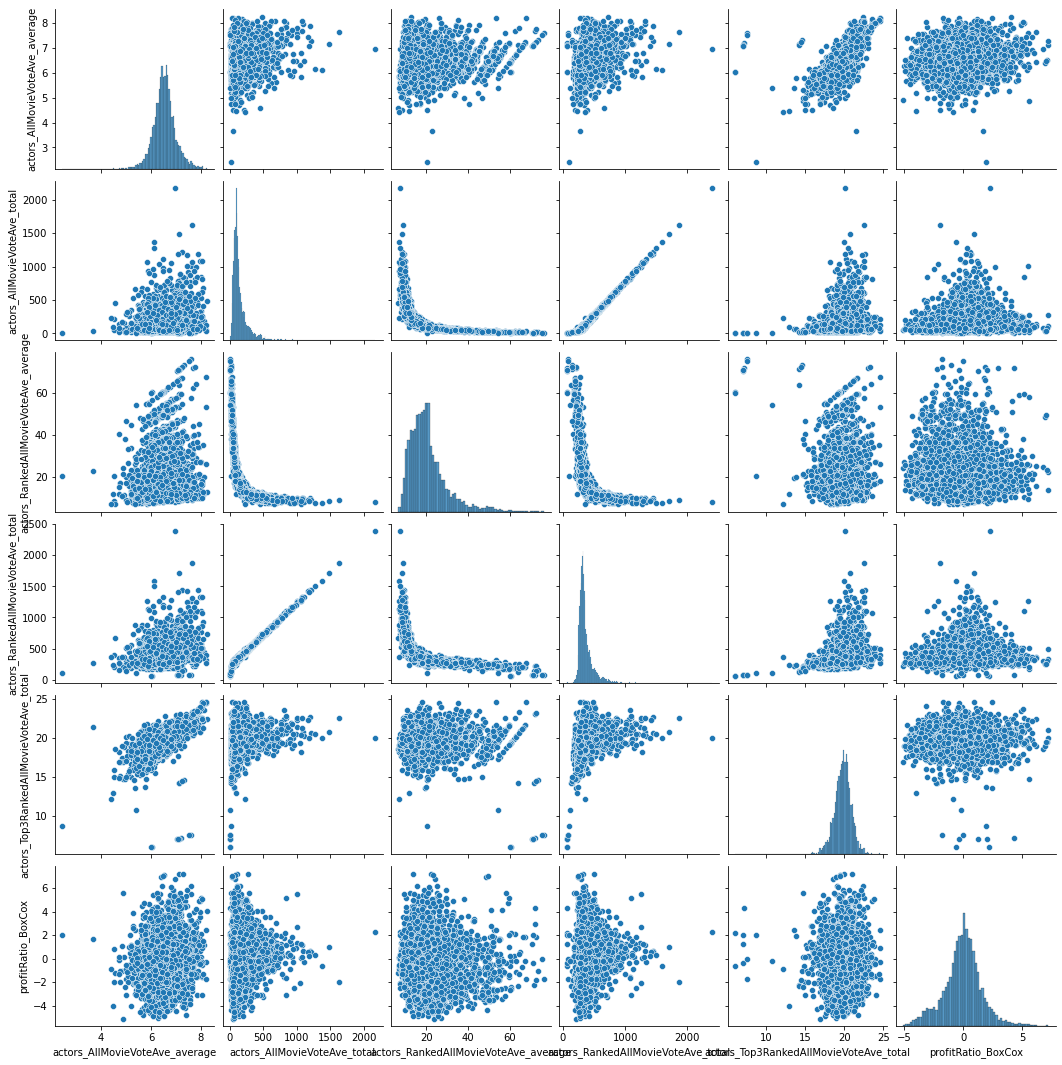

In [91]:
sns.pairplot(subset)

### Actors Previous Movies Average Historical Ranking
<ul>
    <li> <b>HistAve_total</b> - 
        <br>1) For each cast memeber, find all their <b>PREVIOUS</b> movies in dataset
        <br>2) For each of their movies, weight their rating based on how old they are compared to the current film
        <br>3) Sum each actor's weighted ratings
        <br>4) Add together all the actors' ratings
    </li>
    <br>
    <li> <b>HistAve_average</b> -
        <br>Mean of <i>HistAve_total</i>
    </li>
    <br>
    <li> <b>RankedHistAve_total</b> - 
        <br>1) For each cast memeber, find all their <b>PREVIOUS</b> movies in dataset
        <br>2) For each of their movies, weight their rating based on how old they are compared to the current film
        <br>3) Sum each actor's weighted ratings, then weight based on their order in the cast list
        <br>4) Add together all the actors' ratings
    </li>
    <br>
    <li> <b>RankedHistAve_average</b> -
        <br>Mean of <i>RankedHistAve_total</i>
    </li>
    <br>
    <li> <b>Top3HistAve_total</b> - 
        <br>1) For the first 3 cast memebers listed, find all their <b>PREVIOUS</b> movies in dataset
        <br>2) For each of their movies, weight their rating based on how old they are compared to the current film
        <br>3) Sum each actor's weighted ratings
        <br>4) Add together all the actors' ratings
    </li>
</ul>

<AxesSubplot:>

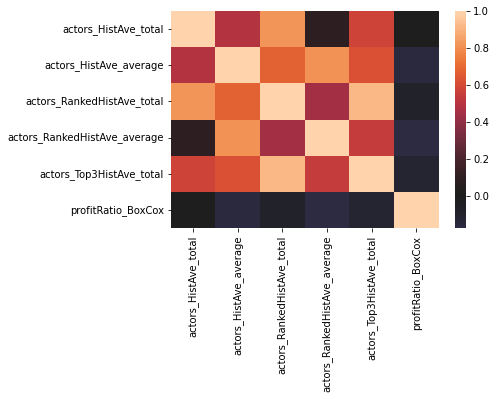

In [92]:
params= ['actors_HistAve_total', 
         'actors_HistAve_average', 
         'actors_RankedHistAve_total',
         'actors_RankedHistAve_average',  
         'actors_Top3HistAve_total']
params.extend(targetVariables)

subset = subNonNullNumeric[params]
sns.heatmap(subset.corr(), center = 0)


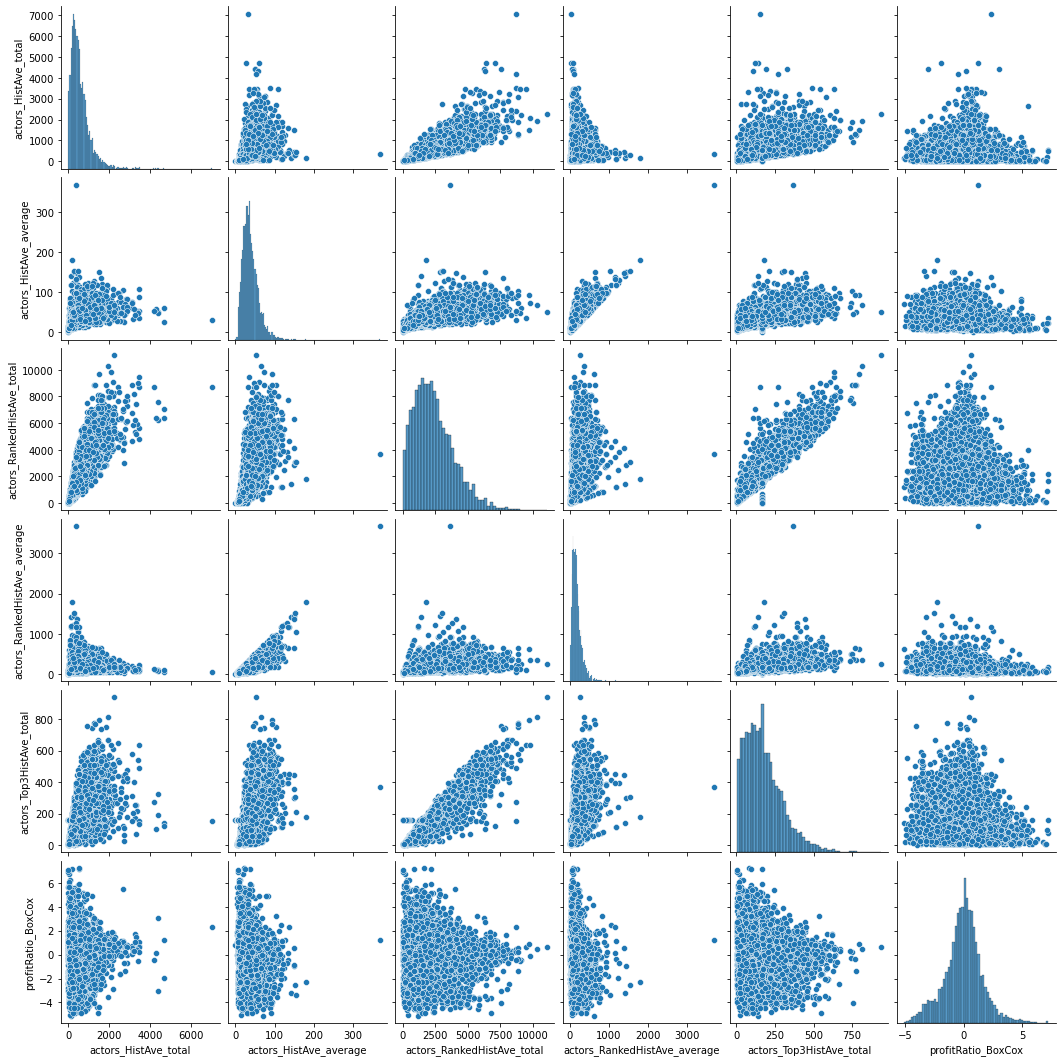

In [93]:
sns.pairplot(subset)

<div class="span5 alert alert-success">
    <h4> Despite processing the Actors Meta Data many different ways, no processing method provided a strong correlation with profit Ratio Box Cox.  Since none provides any more explanitory power than any other, recommended to create a model from All Movie Average Rating, as it is the easiest to calculate</h4>
</div>  

### Crew Ratings
#### Three crew member positions were selected from the list of crew, Director, Editor, and Screenwriter.  The feature engineering process was the same for each position and is summarized below
<ul>
    <li> <b>AveRating</b> - 
        <br>1) For each listed crew job, find all their <b>PREVIOUS</b> movies in dataset
        <br>2) Take the Average of the ratings of all these films
        <br>3) Take Average of each listed crew member's Average Ratings
    </li>
    <br>
    <li> <b>VoteAveRating</b> -
        <br>1) For each listed crew job, find all their <b>PREVIOUS</b> movies in dataset
        <br>2) For each of their movies, multiply the rating by the number of votes and add to running total
        <br>3) Divide Running total by total number of votes
        <br>4) Take Average of each listed crew member's Vote Ratings
    </li>
    <br>
    <li> <b>HistAveRating</b> - 
        <br>1) For each listed crew job, find all their <b>PREVIOUS</b> movies in dataset
        <br>2) For each of their movies, weight their rating based on how old they are compared to the current film
        <br>3) Take Average of each listed crew member's Vote Ratings
    </li>
    <br>
    <li> <b>AllAveRating</b> - 
        <br>1) For each listed crew job, find <b>ALL</b> their movies in dataset
        <br>2) Take the Average of the ratings of all these films
        <br>3) Take Average of each listed crew member's Average Ratings
    </li>
    <br>
    <li> <b>AllVoteAveRating</b> - 
        <br>1) For each listed crew job, find <b>ALL</b> their  movies in dataset
        <br>2) For each of their movies, multiply the rating by the number of votes and add to running total
        <br>3) Divide Running total by total number of votes
        <br>4) Take Average of each listed crew member's Vote Ratings
    </li>
</ul>

#### Director

<AxesSubplot:>

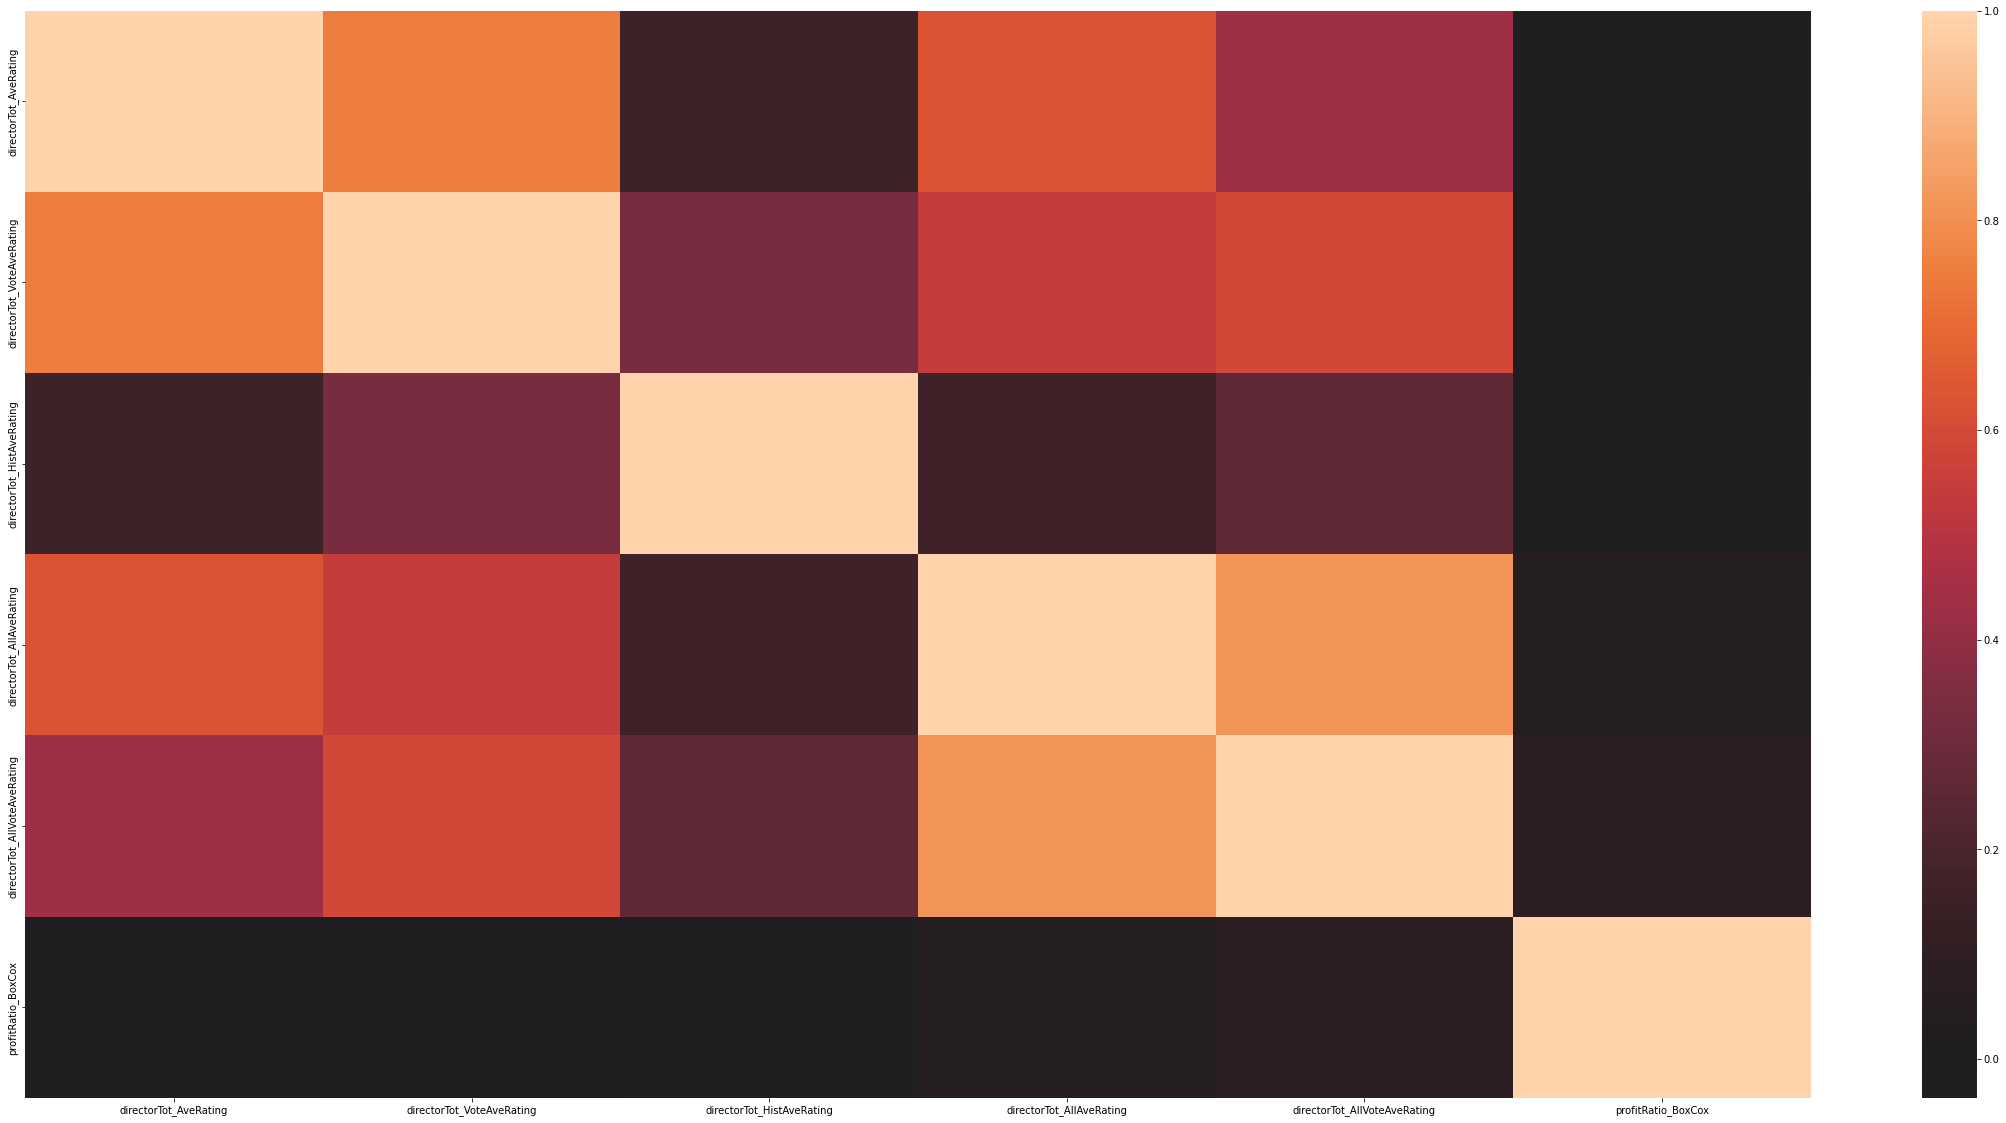

In [110]:
params = ['directorTot_AveRating', 
          'directorTot_VoteAveRating', 
          'directorTot_HistAveRating', 
          'directorTot_AllAveRating', 
          'directorTot_AllVoteAveRating']
params.extend(targetVariables)

subset = subNonNullNumeric[params]
sns.heatmap(subset.corr(), center = 0)

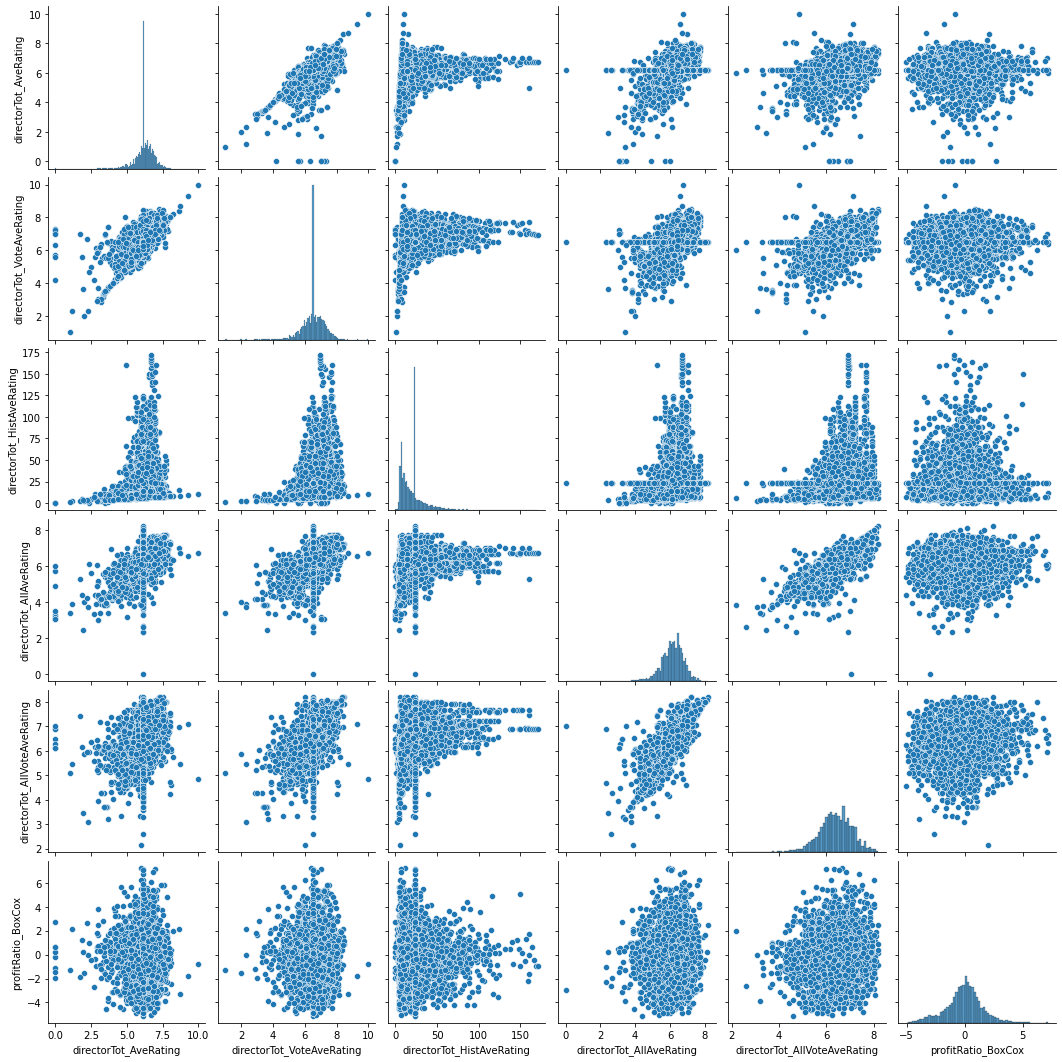

In [111]:
sns.pairplot(subset)

<div class="span5 alert alert-success">
    <h4> No processed Director features have a strong correlation with profit Ratio Box Cox.  Also, these parameters seem donminated by the mean values inserted to fill the missing data.  </h4>
</div>  

#### Screenwriter

<AxesSubplot:>

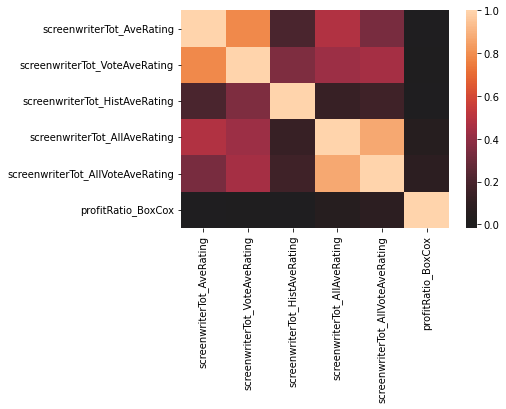

In [96]:
params = ['screenwriterTot_AveRating', 
          'screenwriterTot_VoteAveRating', 
          'screenwriterTot_HistAveRating', 
          'screenwriterTot_AllAveRating', 
          'screenwriterTot_AllVoteAveRating']
params.extend(targetVariables)

subset = subNonNullNumeric[params]
sns.heatmap(subset.corr(), center = 0)

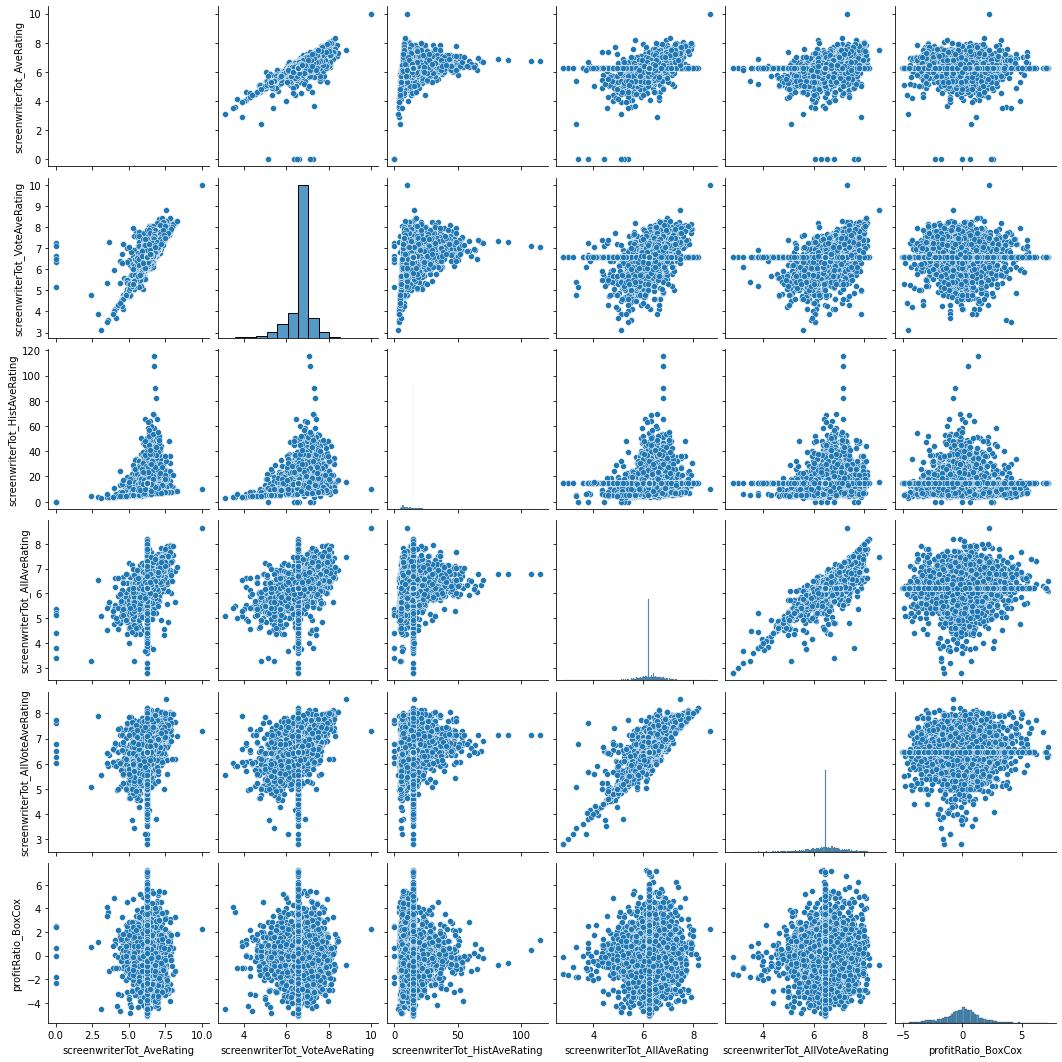

In [97]:
sns.pairplot(subset)

<div class="span5 alert alert-success">
    <h4> No processed Editor features have a strong correlation with profit Ratio Box Cox.  Like Director Parameters, these parameters seem donminated by the mean values inserted to fill the missing data.  </h4>
</div>  

#### Editor

<AxesSubplot:>

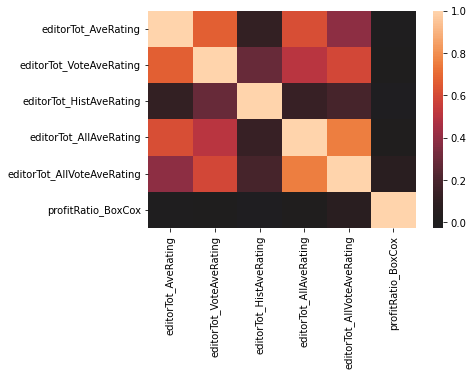

In [98]:
params = ['editorTot_AveRating', 
          'editorTot_VoteAveRating', 
          'editorTot_HistAveRating', 
          'editorTot_AllAveRating', 
          'editorTot_AllVoteAveRating']
params.extend(targetVariables)

subset = subNonNullNumeric[params]
sns.heatmap(subset.corr(), center = 0)

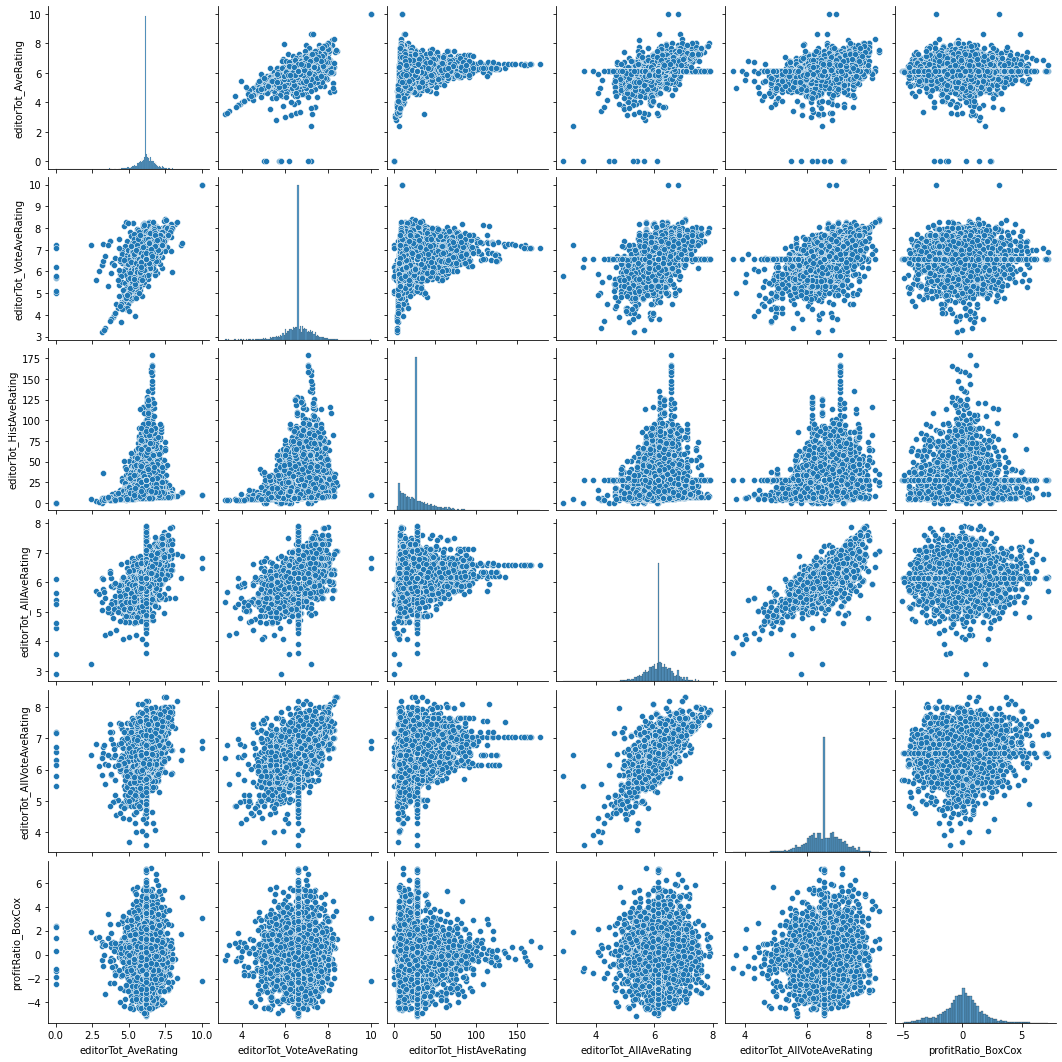

In [99]:
sns.pairplot(subset)

<div class="span5 alert alert-success">
    <h4> No processed Screenwriter features have a strong correlation with profit Ratio Box Cox.  Like Director Parameters, these parameters seem donminated by the mean values inserted to fill the missing data.  </h4>
</div>  

#### Keyword and Genre Rankings
<ul>
    <li> <b>keywordTot_AveRating</b> - 
        <br>1) For each listed keyword, find <b>ALL</b> movies with that keyword in dataset
        <br>2) Take the Average of the ratings of all these films
        <br>3) Take Average of each listed keywords's Average Ratings
    </li>
    <br>
    <li> <b>genreTot_RankedAveRating</b> -
        <br>1) For each listed genre, find <b>ALL</b> movies with that genre in dataset
        <br>2) Take the Average of the ratings of all these films
        <br>3) Take Average of each listed genre's Average Ratings
    </li>
    <br>
</ul>

<AxesSubplot:>

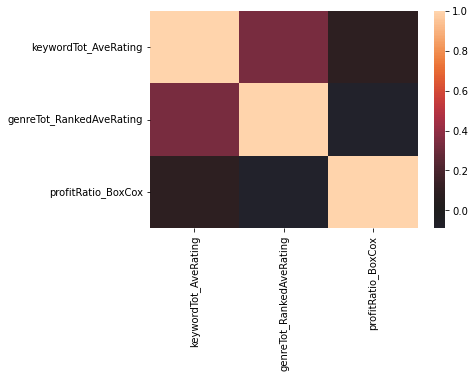

In [100]:
params = ['keywordTot_AveRating', 'genreTot_RankedAveRating']
params.extend(targetVariables)

subset = subNonNullNumeric[params]
sns.heatmap(subset.corr(), center = 0)

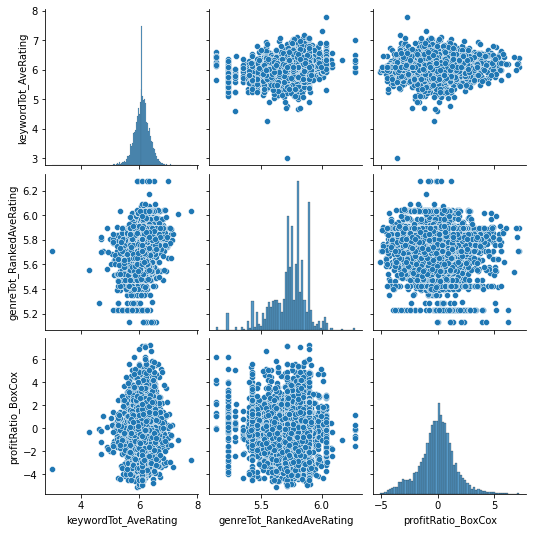

In [101]:
sns.pairplot(subset)

<div class="span5 alert alert-success">
    <h4> No Keyword or Genre features have a strong correlation with profit Ratio Box Cox.   </h4>
</div>  

### Insights

<div class="span5 alert alert-success">
    <h4> Seems there's almost no correlation between profit Ratio with any explanitory variable. Linear Regression for these variables not recomended, but Multiple Linear regression may be able to add several weak correlations into something useful</h4>
</div>  


## Multiple Linear Regression

### Box Office Profit Margin

In [113]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
multRegDataX = subNonNullNumeric.loc[:, ~subNonNullNumeric.columns.isin(['BoxOfficeProfitMargin','profit_margin','release_date','budget','revenue','Domestic','profitRatio','profitRatio_BoxCox'])]
multRegDataY = subNonNullNumeric[['profitRatio_BoxCox']]

# Create constants for X, so the model knows its bounds
multRegDataX = sm.add_constant(multRegDataX)

# Split the data
X_trainMult, X_testMult, y_trainMult, y_testMult = train_test_split(multRegDataX, multRegDataY, test_size=0.25)

C:\Users\Karl\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [114]:
# Create the profitRatio model
modelMult_profitRatio = sm.OLS(y_trainMult,X_trainMult)
results_profitRatio = modelMult_profitRatio.fit()
results_profitRatio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     profitRatio_BoxCox   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     21.14
Date:                Sat, 12 Mar 2022   Prob (F-statistic):          2.10e-154
Time:                        20:36:47   Log-Likelihood:                -7597.0
No. Observations:                4209   AIC:                         1.529e+04
Df Residuals:                    4162   BIC:                         1.559e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      6.0550      1.093      5.540      0.000       3.912       8.198
popularity                                 0.0052      0.002      2.721      0.007       0.001       0.009
runtime                                   -0.0090      0.001     -6.968      0.000      -0.012      -0.006
vote_average                               0.6044      0.055     10.964      0.000       0.496       0.712
vote_count                                 0.0003   2.67e-05      9.398      0.000       0.000       0.000
actors_AveRating_average                  -0.3185      0.259     -1.231      0.218      -0.826       0.189
actors_AveRating_total                    -0.0013      0.018     -0.071      0.943      -0.036       0.033
actors_RankedAveRating_average             0.0025      0.008      0.321      0.748      -0.013       0.018
actors_RankedAveRating_total               0.0437      0.048      0.910      0.363      -0.050       0.138
actors_Top3AveRating_total                -0.1094      0.065     -1.682      0.093      -0.237       0.018
actors_VoteAve_average                     0.4319      0.254      1.698      0.090      -0.067       0.930
actors_VoteAve_total                      -0.0002      0.017     -0.014      0.989      -0.034       0.033
actors_RankedVoteAve_average              -0.0415      0.046     -0.910      0.363      -0.131       0.048
actors_RankedVoteAve_total                -0.0035      0.007     -0.482      0.630      -0.018       0.011
actors_Top3VoteAve_total                   0.0903      0.061      1.479      0.139      -0.029       0.210
actors_HistAve_average                    -0.0130      0.005     -2.750      0.006      -0.022      -0.004
actors_HistAve_total                       0.0004      0.000      1.504      0.133      -0.000       0.001
actors_RankedHistAve_average               0.0007      0.001      1.125      0.261      -0.001       0.002
actors_RankedHistAve_total                -0.0001   9.74e-05     -1.438      0.151      -0.000    5.09e-05
actors_Top3HistAve_total                   0.0004      0.001      0.486      0.627      -0.001       0.002
actors_AllMovieAve_average                -1.1511      0.287     -4.016      0.000      -1.713      -0.589
actors_AllMovieAve_total                   0.0480      0.013      3.650      0.000       0.022       0.074
actors_RankedAllMovieAve_average           0.0727      0.059      1.238      0.216      -0.042       0.188
actors_RankedAllMovieAve_total            -0.0391      0.010     -3.996      0.000      -0.058      -0.020
actors_Top3RankedAllMovieAve_total         0.2675      0.088      3.055      0.002       0.096       0.439
actors_AllMovieVoteAve_average             0.9689      0.285      3.405      0.001     

<div class="span5 alert alert-success">
    <h4>Very small R squared value, almost no predictive power in this model</h4>
</div>  

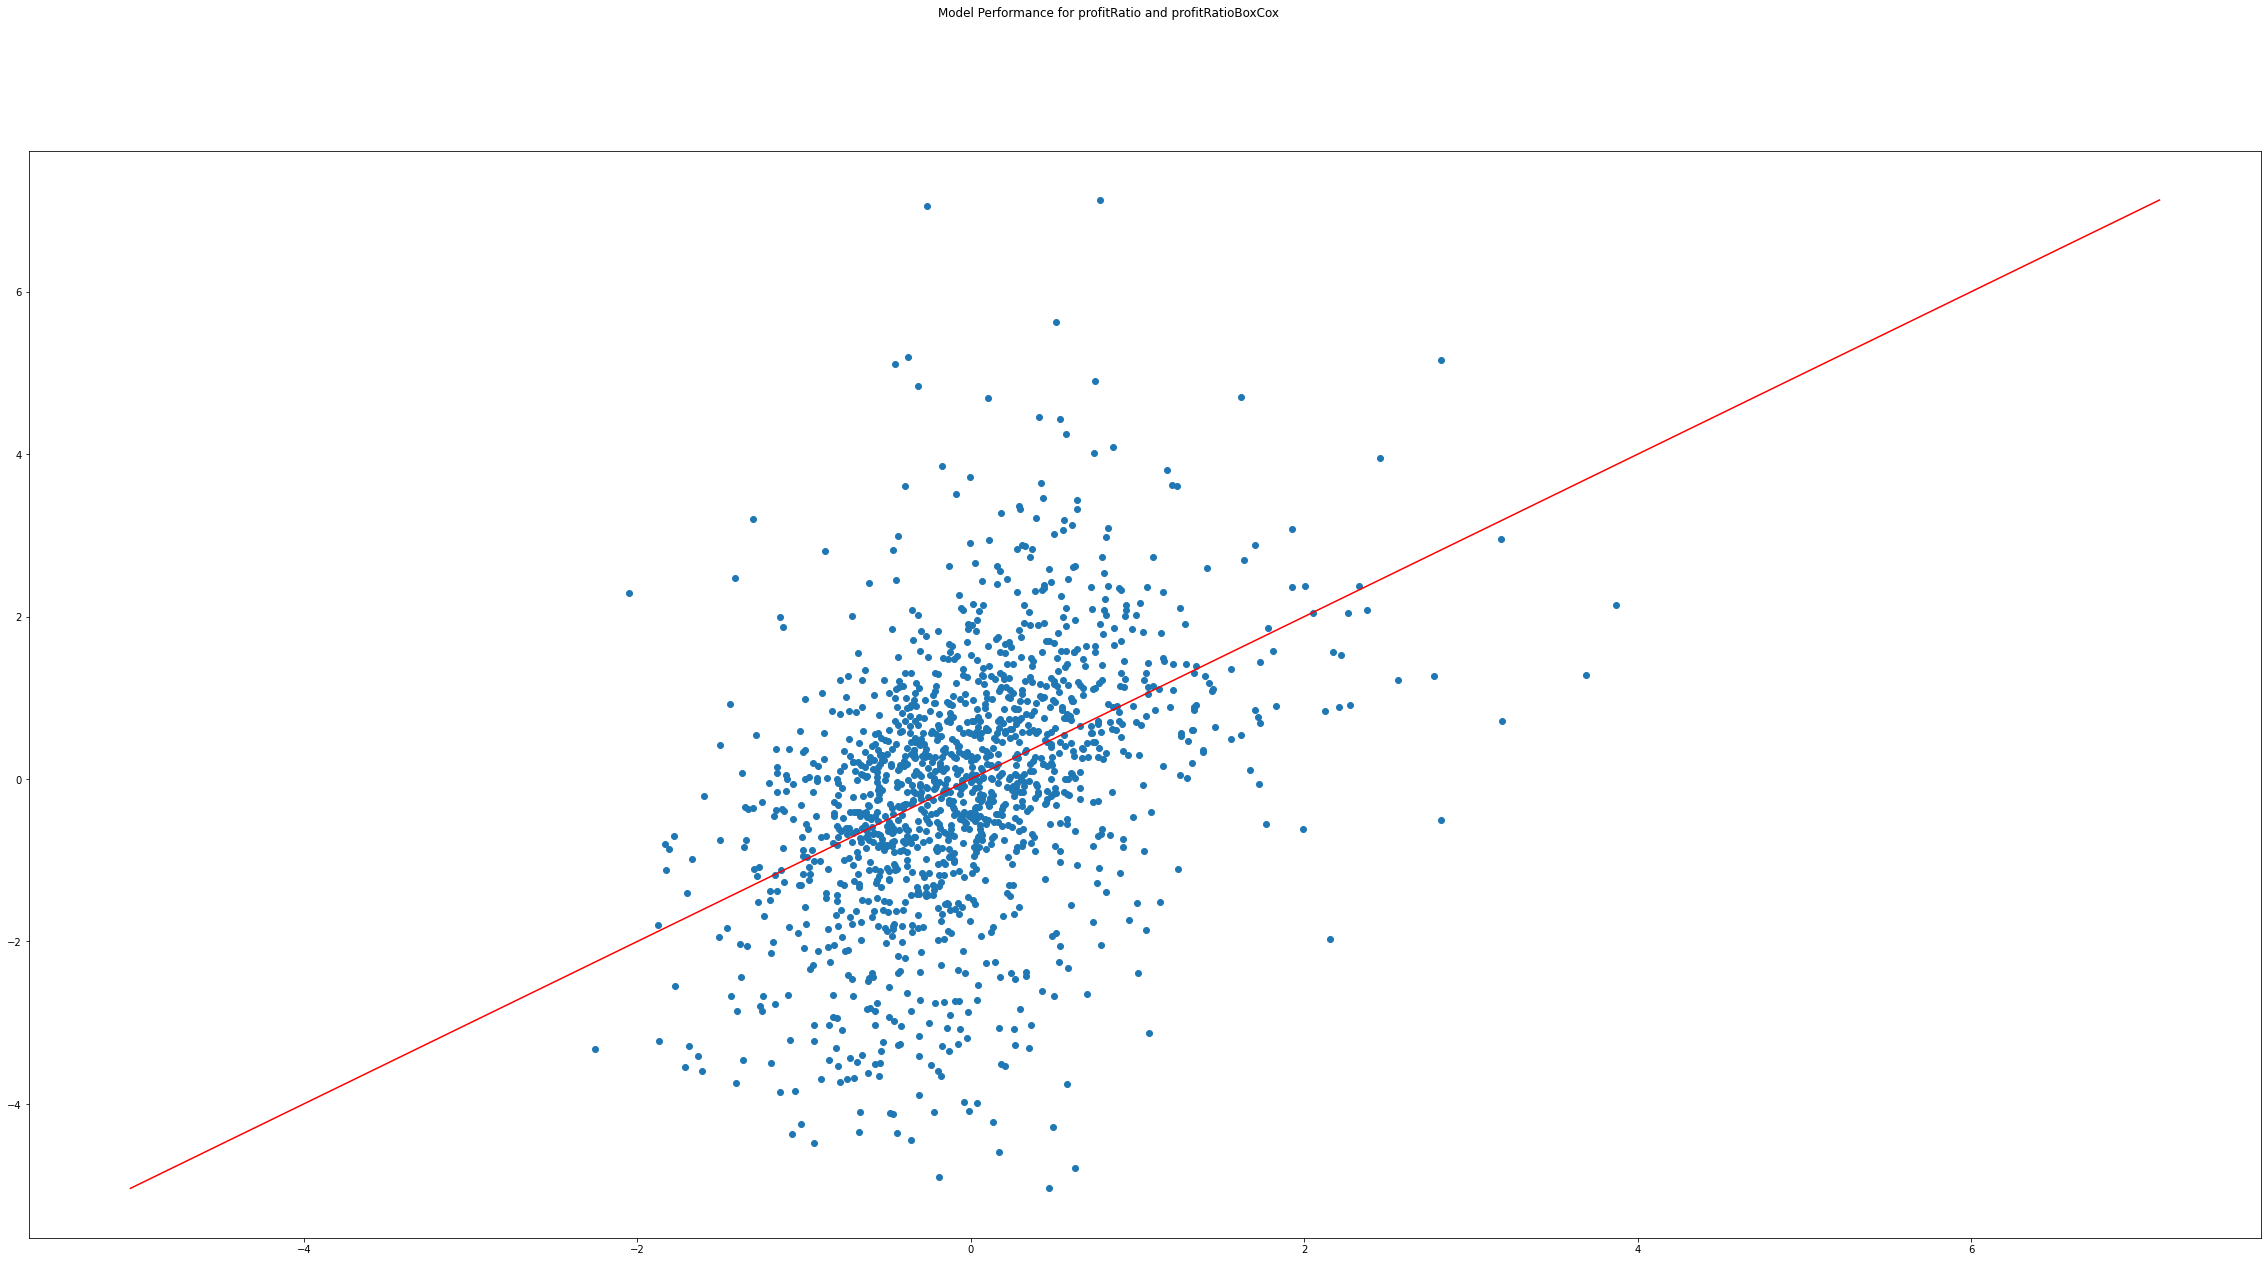

In [116]:
# Plot the predictions
ypredProfitRatio_BoxCox = results_profitRatioBoxCox.predict(X_testMult)

# Build a scatterplot
plt.suptitle('Model Performance for profitRatio and profitRatioBoxCox')

plt.scatter(ypredProfitRatio_BoxCox, y_testMult['profitRatio_BoxCox'])
x = np.linspace(min(y_testMult['profitRatio_BoxCox']), max(y_testMult['profitRatio_BoxCox']), 1000)
plt.plot(x, x, color='r');
# Add a line for perfect correlation.
plt.show()

<div class="span5 alert alert-success">
    <h4>As surmized, this model has very poor performance, as the profitRatios it predicts are far off from the observed values </h4>
</div>  

## Separation of Production Companies

#### Curious which produciton companies are in the data set, which perform the best, and whether this may be a useful metric in preditcting profit Ratio, given the other features had low predictive power

In [106]:
prodCompaniesDF = pd.read_csv("movieData_SeparatedProductionCompanies.csv")
prodCompaniesDF.head()

id             title                               production_companies  \
0    862         Toy Story     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1   8844           Jumanji  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2   8844           Jumanji  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
3   8844           Jumanji  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
4  15602  Grumpier Old Men  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   

                                production_countries  adult  popularity  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   True   21.946943   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   True   17.015539   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   True   17.015539   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   True   17.015539   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   True   11.712900   

          release_date  runtime  vote_average  vote_count  ...      budget  \
0  1995-10-30 00:00:00     81.0           7.7      5415.0  ...  30000000.0   
1  1995-12-15 00:00:00    104.0           6.9      2413.0  ...  65000000.0   
2  1995-12-15 00:00:00    104.0           6.9      2413.0  ...  65000000.0   
3  1995-12-15 00:00:00    104.0           6.9      2413.0  ...  65000000.0   
4  1995-12-22 00:00:00    101.0           6.5        92.0  ...  25000000.0   

       revenue     Domestic  BoxOfficeProfitMargin  profit_margin  \
0  373554033.0  223225679.0             644.085597     1145.18011   
1  262797249.0  100499940.0              54.615292      304.30346   
2  262797249.0  100499940.0              54.615292      304.30346   
3  262797249.0  100499940.0              54.615292      304.30346   
4   71500000.0   71518503.0             186.074012      186.00000   

   profitRatio  logProfitRatio  profitRatio_BoxCox  ProductionCompany_Id  \
0     7.440856        2.006986            2.139794                   3.0   
1     1.546153        0.435770            0.441825                 559.0   
2     1.546153        0.435770            0.441825                2550.0   
3     1.546153        0.435770            0.441825               10201.0   
4     2.860740        1.051080            1.086769                6194.0   

      ProductionCompany_Name  
0    Pixar Animation Studios  
1           TriStar Pictures  
2               Teitler Film  
3  Interscope Communications  
4               Warner Bros.  

[5 rows x 62 columns]

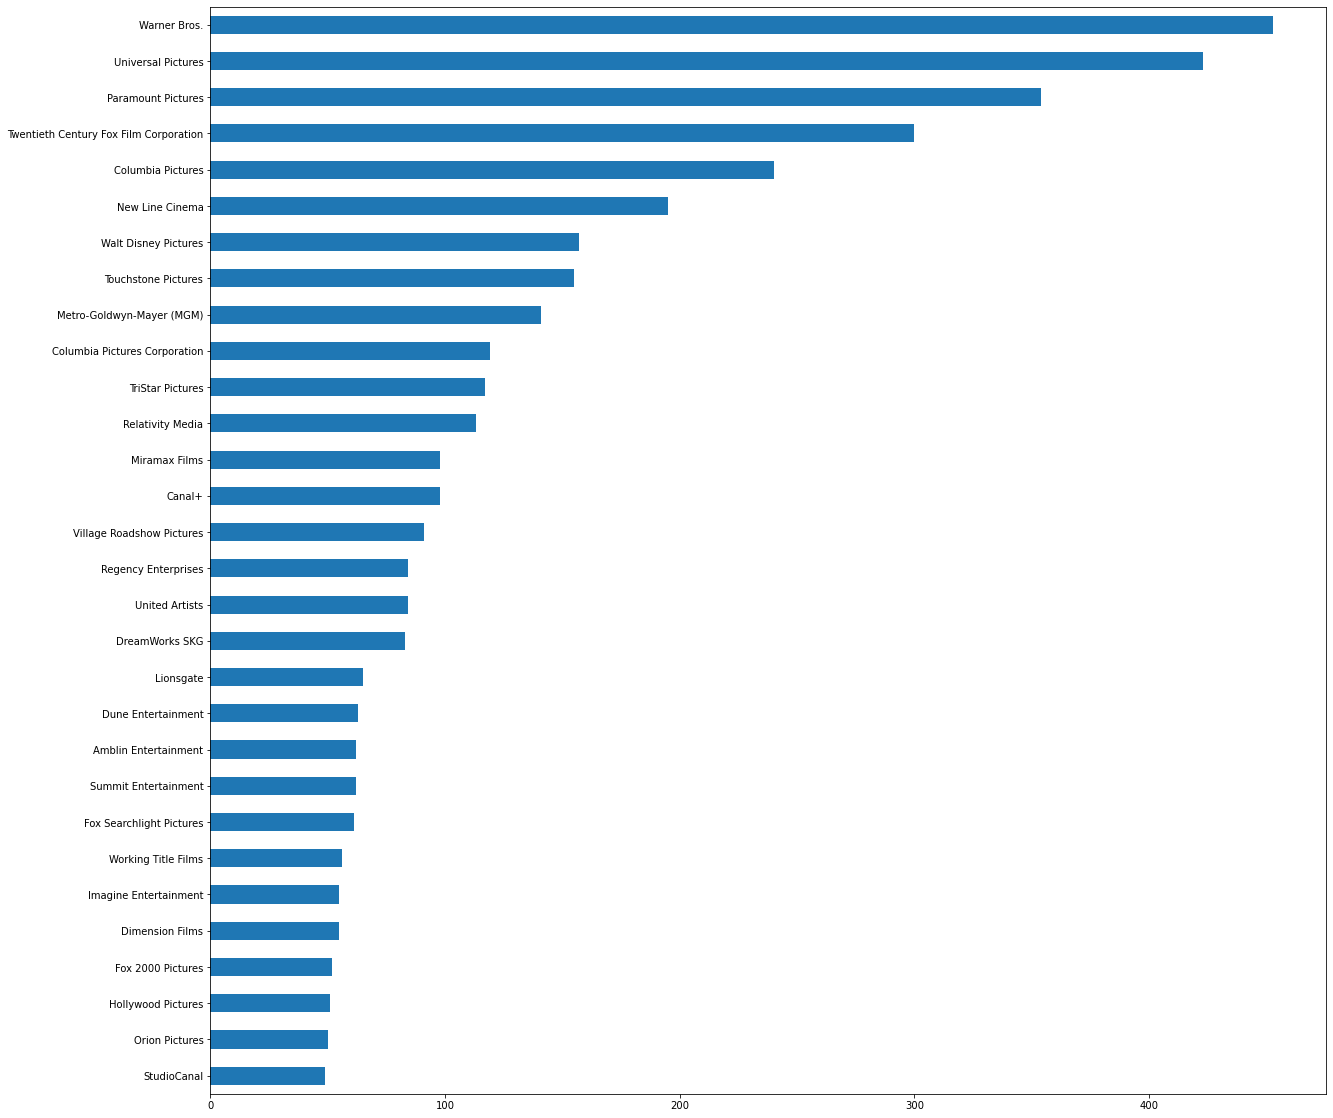

In [148]:
numOfTopProdComps = 30
mostCommon = prodCompaniesDF.ProductionCompany_Name.value_counts().sort_values(ascending=True).iloc[-numOfTopProdComps:]
mostCommon.plot(kind = 'barh')
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()


In [151]:
per = len(prodCompaniesDF[prodCompaniesDF['ProductionCompany_Name'].isin(list(mostCommon.keys()))])/len(prodCompaniesDF)
print("Percent of production companies in top {0} out of all the production compainies in the data set: {1}".format(numOfTopProdComps, 100*per))

Percent of production companies in top 30 out of all the production compainies in the data set: 24.225112434666343


In [150]:
filmsbyMostCommonCompanies = set(prodCompaniesDF['id'])- \
                            set(prodCompaniesDF[prodCompaniesDF['ProductionCompany_Name'].isin(list(mostCommon.keys()))]['id'])
per = 1-len(filmsbyMostCommonCompanies)/len(set(prodCompaniesDF['id']))
print("Percent of films with at least one of the top {0} production compainies in the data set: {1}".format(numOfTopProdComps, 100*per))

Percent of films with at least one of the top 30 production compainies in the data set: 61.96921935842759


<div class="span5 alert alert-success">
    <h4>30 most frequent production companies in dataset account for only 24 percent of the production companies listed, but for 62 percent of the films in the dataset</h4>
</div>  

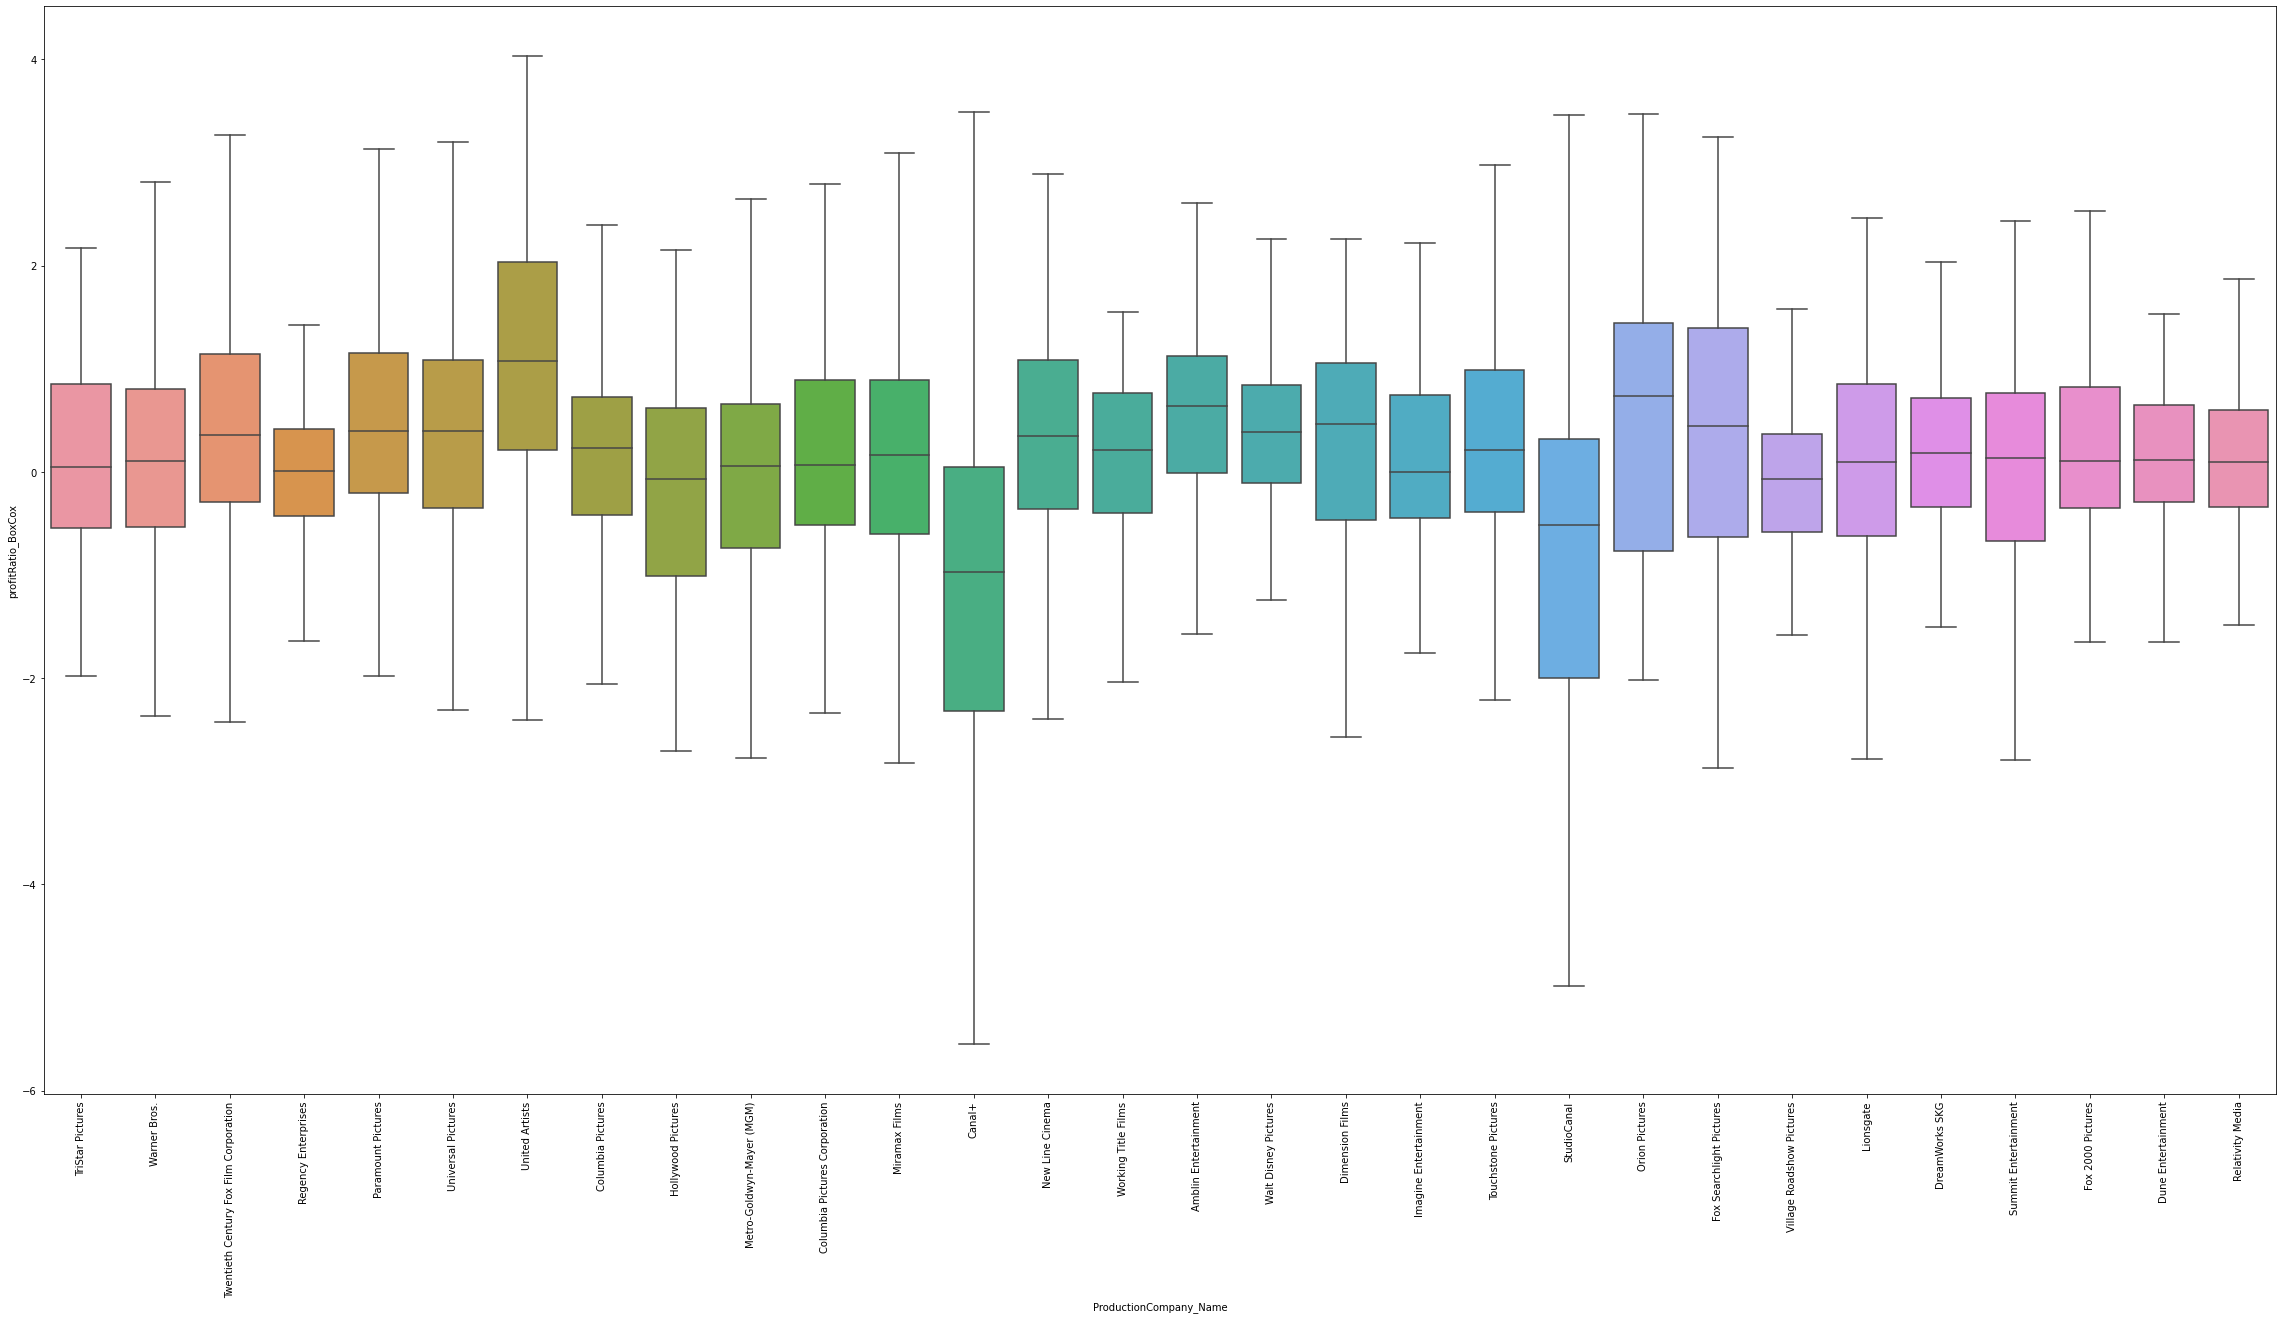

In [155]:
mostPrevalentDF = prodCompaniesDF[prodCompaniesDF.ProductionCompany_Name.isin(mostCommon.keys())]

p = sns.boxplot(x = 'ProductionCompany_Name', y = 'profitRatio_BoxCox', data =mostPrevalentDF,showfliers=False)
p.set_xticklabels(p.get_xticklabels(),rotation=90)

plt.rcParams['figure.figsize'] = [40, 20]
plt.show()

In [156]:
prodGrouped = mostPrevalentDF.groupby('ProductionCompany_Name')
prodGrouped.profitRatio_BoxCox.describe()

count      mean       std       min  \
ProductionCompany_Name                                                        
Amblin Entertainment                     62.0  0.618116  0.976323 -1.576509   
Canal+                                   98.0 -1.314110  1.932804 -5.550198   
Columbia Pictures                       240.0  0.141626  0.999552 -3.929869   
Columbia Pictures Corporation           119.0  0.183903  1.236230 -4.437465   
Dimension Films                          55.0  0.045736  1.671861 -5.660556   
DreamWorks SKG                           83.0  0.184394  0.832807 -2.012112   
Dune Entertainment                       63.0  0.148472  0.809958 -1.646791   
Fox 2000 Pictures                        52.0  0.230753  0.848363 -1.646791   
Fox Searchlight Pictures                 61.0  0.388550  1.508489 -4.791651   
Hollywood Pictures                       51.0 -0.199891  1.293780 -4.565585   
Imagine Entertainment                    55.0  0.114149  1.100029 -3.450238   
Lionsgate                                65.0  0.027775  1.258612 -5.194067   
Metro-Goldwyn-Mayer (MGM)               141.0  0.042713  1.343391 -5.025243   
Miramax Films                            98.0  0.157910  1.359837 -3.354303   
New Line Cinema                         195.0  0.353953  1.077070 -2.393188   
Orion Pictures                           50.0  0.387023  1.407101 -2.016190   
Paramount Pictures                      354.0  0.540674  1.263980 -4.394267   
Regency Enterprises                      84.0 -0.063053  0.832781 -3.743154   
Relativity Media                        113.0  0.135626  0.796543 -3.549922   
StudioCanal                              49.0 -1.091405  1.985744 -5.607958   
Summit Entertainment                     62.0  0.085242  1.293508 -3.306940   
Touchstone Pictures                     155.0  0.260832  1.082893 -2.770535   
TriStar Pictures                        117.0  0.088907  1.217357 -4.355452   
Twentieth Century Fox Film Corporation  300.0  0.442633  1.215399 -3.698804   
United Artists                           84.0  1.091708  1.414262 -2.410792   
Universal Pictures                      423.0  0.405533  1.192934 -5.359506   
Village Roadshow Pictures                91.0 -0.184732  0.987866 -4.660179   
Walt Disney Pictures                    157.0  0.400141  0.964610 -5.071479   
Warner Bros.                            453.0  0.114631  1.265207 -4.838914   
Working Title Films                      56.0  0.029206  1.041553 -2.656458   

                                             25%       50%       75%       max  
ProductionCompany_Name                                                          
Amblin Entertainment                   -0.015894  0.642223  1.124795  4.198900  
Canal+                                 -2.314858 -0.974648  0.041981  3.492119  
Columbia Pictures                      -0.422874  0.233142  0.724805  2.970617  
Columbia Pictures Corporation          -0.511417  0.064249  0.890628  3.436005  
Dimension Films                        -0.472125  0.467121  1.056549  2.259326  
DreamWorks SKG                         -0.341751  0.184432  0.715724  2.427430  
Dune Entertainment                     -0.297201  0.110143  0.643513  2.254211  
Fox 2000 Pictures                      -0.351136  0.108219  0.825071  2.524604  
Fox Searchlight Pictures               -0.634424  0.445145  1.397035  3.244529  
Hollywood Pictures                     -1.014307 -0.068846  0.615708  2.152489  
Imagine Entertainment                  -0.452018  0.000000  0.747521  2.218297  
Lionsgate                              -0.621479  0.093632  0.848555  2.462176  
Metro-Goldwyn-Mayer (MGM)              -0.741562  0.053587  0.653738  4.443386  
Miramax Films                          -0.605639  0.163341  0.892316  4.387999  
New Line Cinema                        -0.362700  0.347945  1.079515  2.886041  
Orion Pictures                         -0.764960  0.732747  1.443528  3.472338  
Paramount Pictures                     -0.204831  0.3

<div class="span5 alert alert-success">
    <h4>Of the most common production companies in the data set, most are consistent with one another.  The outstanding production companies are Canal+ and StudioCanal, which account for many of the worst performing films and have the largest standard deviations </h4>
</div> 

## Conclusions and Next Steps

<div class="span5 alert alert-success">
    <h4>The parameters generated during data wrangling have almost no predictive power when but into a Multiple Linear Regression Model.  Perhaps nonlinear regression models or separating the profit margins into bins to be used in classification models will be more fruitful.  Another possibility would be classifying the profitRatio BoxCox into profitable vs non-profitable sections, seeing if a model can predict this outcome </h4>
</div> 